In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [2]:
df_att = pd.read_csv("D:\Python\WebApp\MLC_Attendance_Eng_FInal_UTF8.csv")

In [3]:
print(df_att.size)

19446


#Data Frame Summary

In [4]:
df_att.describe()

,Date_Start,Date_End,Year,Attendance,Unnamed: 18,lat,lon
count,926.000000,926.00000,926.000000,926.000000,0.0,926.000000,926.000000
mean,15.757019,15.75486,2017.514039,7.568035,NaN,55.738347,37.172129
std,8.732315,8.72346,2.352989,5.050364,NaN,1.309902,2.790043
min,1.000000,1.00000,2013.000000,0.000000,NaN,38.750600,-9.162280
25%,8.000000,8.00000,2016.000000,4.000000,NaN,55.770947,37.502409
50%,16.000000,16.00000,2017.000000,7.000000,NaN,55.797362,37.585134
75%,23.000000,23.00000,2020.000000,10.000000,NaN,55.804155,37.614987
max,31.000000,31.00000,2022.000000,31.000000,NaN,60.203620,39.879507


In [5]:
df_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             926 non-null    object 
 1   Status           926 non-null    object 
 2   Type             926 non-null    object 
 3   Creator          926 non-null    object 
 4   Date             926 non-null    object 
 5   Day_Start        926 non-null    object 
 6   Day_End          926 non-null    object 
 7   Month_Start      926 non-null    object 
 8   Month_Finish     926 non-null    object 
 9   Date_Start       926 non-null    int64  
 10  Date_End         926 non-null    int64  
 11  Year             926 non-null    int64  
 12  Time_Start       926 non-null    object 
 13  Duration         926 non-null    object 
 14  Location         926 non-null    object 
 15  Going            926 non-null    object 
 16  Attendance       926 non-null    int64  
 17  Date_Date_Excel 

#Change "Date_Date_Excel" to datetime + resummary

In [6]:
# Assuming your DataFrame is named df_att
df_att['Date_Date_Excel'] = pd.to_datetime(df_att['Date_Date_Excel'], format='%A, %B %d, %Y')

# Check the updated data types
print(df_att['Date_Date_Excel'].dtype)



datetime64[ns]


In [7]:
df_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             926 non-null    object        
 1   Status           926 non-null    object        
 2   Type             926 non-null    object        
 3   Creator          926 non-null    object        
 4   Date             926 non-null    object        
 5   Day_Start        926 non-null    object        
 6   Day_End          926 non-null    object        
 7   Month_Start      926 non-null    object        
 8   Month_Finish     926 non-null    object        
 9   Date_Start       926 non-null    int64         
 10  Date_End         926 non-null    int64         
 11  Year             926 non-null    int64         
 12  Time_Start       926 non-null    object        
 13  Duration         926 non-null    object        
 14  Location         926 non-null    object   

In [8]:
df_att.head()

,Name,Status,Type,Creator,Date,Day_Start,Day_End,Month_Start,Month_Finish,Date_Start,...,Year,Time_Start,Duration,Location,Going,Attendance,Date_Date_Excel,Unnamed: 18,lat,lon
0,Saturday Practice,Completed,Team Practice,Eugene Arkhipov,"SATURDAY, NOVEMBER 2, 2013 AT 4 PM UTC+03",SATURDAY,SATURDAY,NOVEMBER,November,2,...,2013,4:00 PM,Duration: 3 hr,"ул. Флотская, 11а, москва",No Data,7,2013-11-02,NaN,55.855204,37.502409
1,Sunday Practice,Completed,Team Practice,Eugene Arkhipov,"SUNDAY, NOVEMBER 3, 2013 AT 11:45 AM UTC+03",SUNDAY,SUNDAY,NOVEMBER,November,3,...,2013,11:45 AM,Duration: 3 hr,"ул. Флотская, 11а, москва",No Data,5,2013-11-03,NaN,55.855204,37.502409
2,Monday Practice,Completed,Team Practice,Eugene Arkhipov,"MONDAY, NOVEMBER 4, 2013 AT 12 PM UTC+03",MONDAY,MONDAY,NOVEMBER,November,4,...,2013,12:00 PM,Duration: 3 hr,"ул. Флотская, 11а, москва",No Data,3,2013-11-04,NaN,55.855204,37.502409
3,Saturday Practice,Completed,Team Practice,Eugene Arkhipov,"SATURDAY, NOVEMBER 9, 2013 AT 4 PM UTC+03",SATURDAY,SATURDAY,NOVEMBER,November,9,...,2013,4:00 PM,Duration: 3 hr,"ул. Флотская, 11а, москва",No Data,11,2013-11-09,NaN,55.855204,37.502409
4,Sunday Practice,Completed,Team Practice,Eugene Arkhipov,"SUNDAY, NOVEMBER 10, 2013 AT 11:45 AM UTC+03",SUNDAY,SUNDAY,NOVEMBER,November,10,...,2013,11:45 AM,Duration: 3 hr,"ул. Флотская, 11а, москва",No Data,11,2013-11-10,NaN,55.855204,37.502409


#Event Statistics

##Totals

In [9]:
# Total count of events
total_events = df_att.shape[0]

# Count of events by Creator
events_by_creator = df_att['Creator'].value_counts()

# Count of different Status (Cancelled and Completed count)
status_counts = df_att['Status'].value_counts()

# Percent completed from all events
completed_percent = (status_counts['Completed'] / total_events) * 100

# Count of different Type (Team Practice, etc)
type_counts = df_att['Type'].value_counts()

# Count of different elements in the Name column
name_counts = df_att['Name'].value_counts()

# Count of events by Location
location_counts = df_att['Location'].value_counts()

In [10]:
# Print the results
print("Total count of events:", total_events)
print("Count of events by Creator:")
print(events_by_creator)


Total count of events: 926
Count of events by Creator:
Eugene Arkhipov           630
Artur Ventsel             287
Zombies Cup                 3
Gus Peters                  1
Sofia Ninjas Lacrosse       1
Budapest New Years Cup      1
Moscow Lacrosse Club        1
Rhinocup - Lacrosse         1
Lisboa Lacrosse Cup         1
Name: Creator, dtype: int64


##Count of Status

In [11]:

print("Count of different Status:")
print(status_counts)
print("Percent completed from all events:", completed_percent, "%")


Count of different Status:
Completed    919
Cancelled      7
Name: Status, dtype: int64
Percent completed from all events: 99.24406047516199 %


##Count of Type

In [12]:

print("Count of different Type:")
print(type_counts)


Count of different Type:
Team Practice                  494
Skills Practice                323
Tournament                      25
Intra-Squad Game                19
Conditioning                    14
Championship                    13
Theory                          13
Clinic                           7
Administrative Function          4
Clinic/Game/Marketing Event      4
Team Building                    4
Stringing                        4
Training Camp                    2
Name: Type, dtype: int64


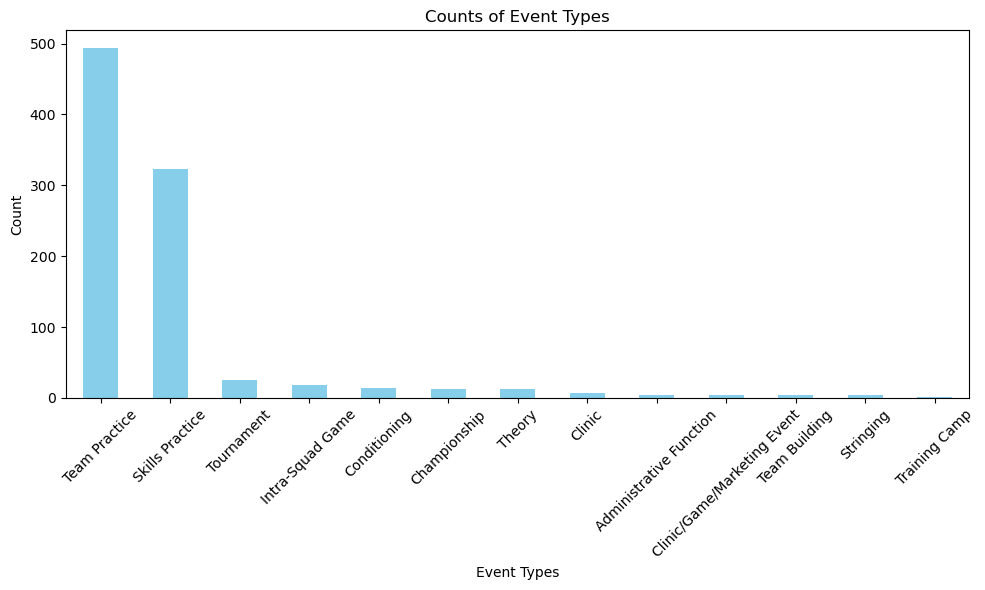

In [13]:

# Create a bar plot
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='skyblue')
plt.title('Counts of Event Types')
plt.xlabel('Event Types')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


##Count of event Name

In [14]:
print("Count of different elements in the Name column:")
print(name_counts)

Count of different elements in the Name column:
Академия Лакросса                       258
Тренировка в воскресенье                 63
Тренировка (суб вечер)                   59
Saturday Practice                        56
Тренировка на поляне                     54
                                       ... 
Тренировка в субботу на Васильевской      1
Тренировка в пятницу на Динамо            1
The Early Frost                           1
The Northern War                          1
Сбор документов                           1
Name: Name, Length: 167, dtype: int64


##Count of events by Location

In [15]:
print("Count of events by Location:")
print(location_counts)

Count of events by Location:
ул. васильевская 5                                         307
Ул. Рогова, 12к1                                           157
Шереметьевская улица 29, Москва, Россия, 127521            156
ул. добролюбова д.2 стр. 3                                  72
ул. Флотская, 11а, москва                                   47
                                                          ... 
Тверская 7                                                   1
Мясницкая ул., 11                                            1
Burgas, Bulgaria                                             1
Трёхпрудный переулок, 11/13                                  1
Krasnaya Presnya St, 24, стр. 1, Moskva, Russia, 123557      1
Name: Location, Length: 62, dtype: int64


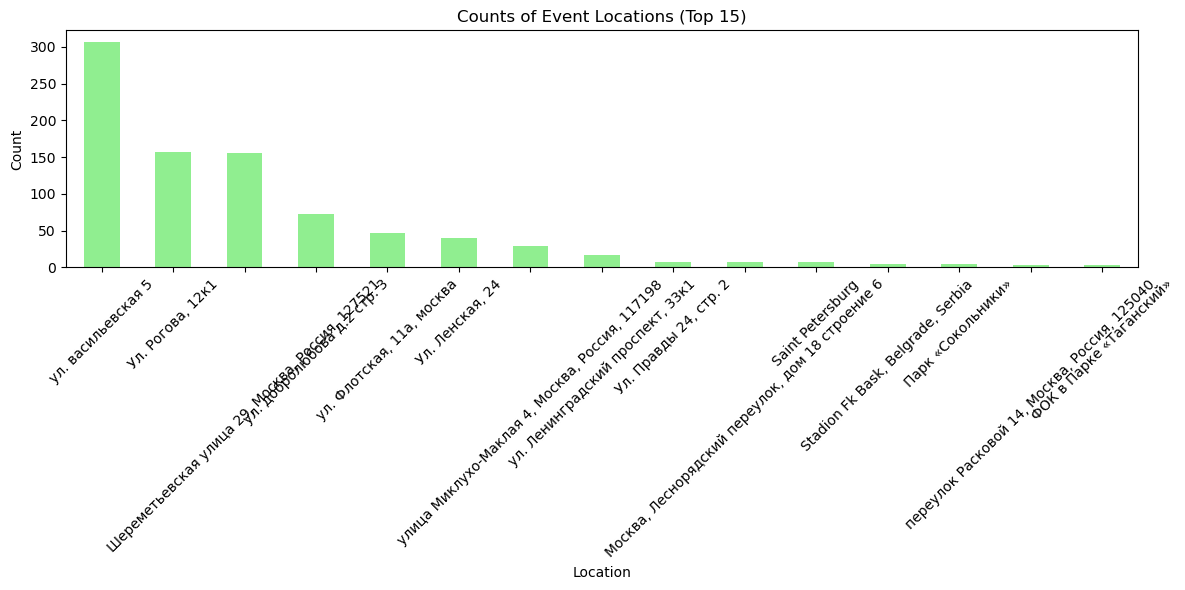

In [16]:
# Assuming you have the 'location_counts' Series
location_counts = df_att['Location'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
location_counts[:15].plot(kind='bar', color='lightgreen')  # Display the top 15 locations for better readability
plt.title('Counts of Event Locations (Top 15)')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



###Top 10 counts of event locations

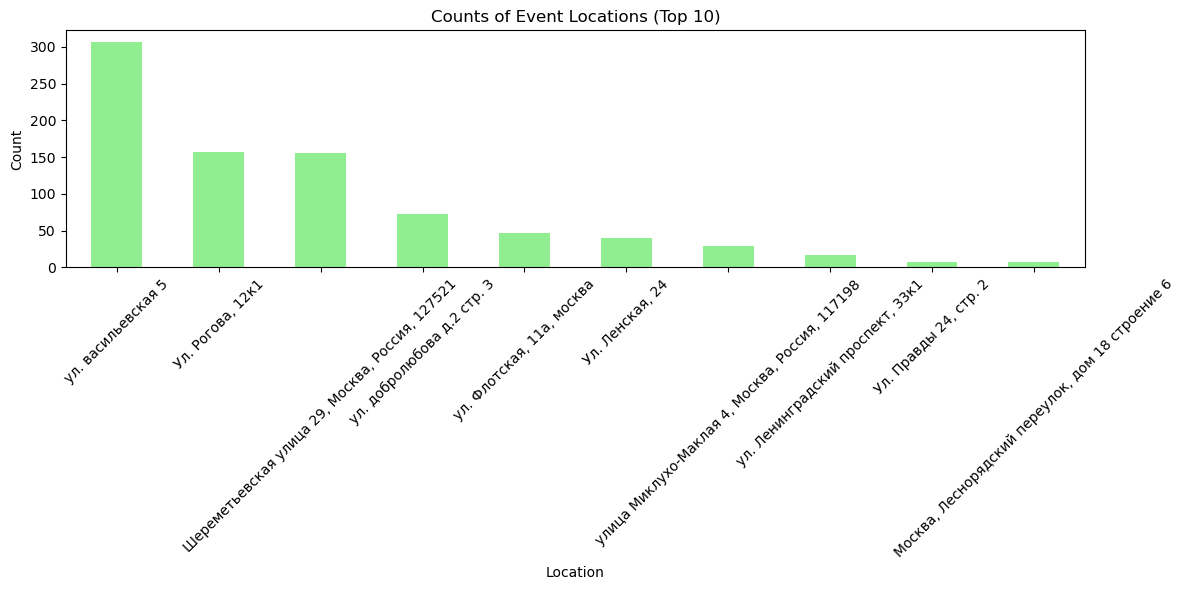

In [17]:
# Assuming you have the 'location_counts' Series
location_counts = df_att['Location'].value_counts()

# Create a bar plot for the top 10 locations
plt.figure(figsize=(12, 6))
location_counts[:10].plot(kind='bar', color='lightgreen')  # Display the top 10 locations
plt.title('Counts of Event Locations (Top 10)')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


#List of Attendees

In [18]:
all_attendees = df_att['Going'].str.split(', ').explode()

# Count the number of attendees
attendees_count = all_attendees.value_counts()

# Print the list of all attendees and their counts
print("List of all attendees and their counts:")
print(attendees_count)

List of all attendees and their counts:
Eugene Arkhipov                                                      699
Artur Ventsel                                                        397
Vladislav Vereschagin                                                333
Artem Denisov                                                        242
Valeo Sosnov                                                         216
                                                                    ... 
10 people responded Going                                              1
Joshua Burkett                                                         1
80 people responded Going                                              1
25 people responded Going                                              1
Practice is cancelled\nWe are just retrubation... along with time      1
Name: Going, Length: 175, dtype: int64


##List of attendees of all events top 20

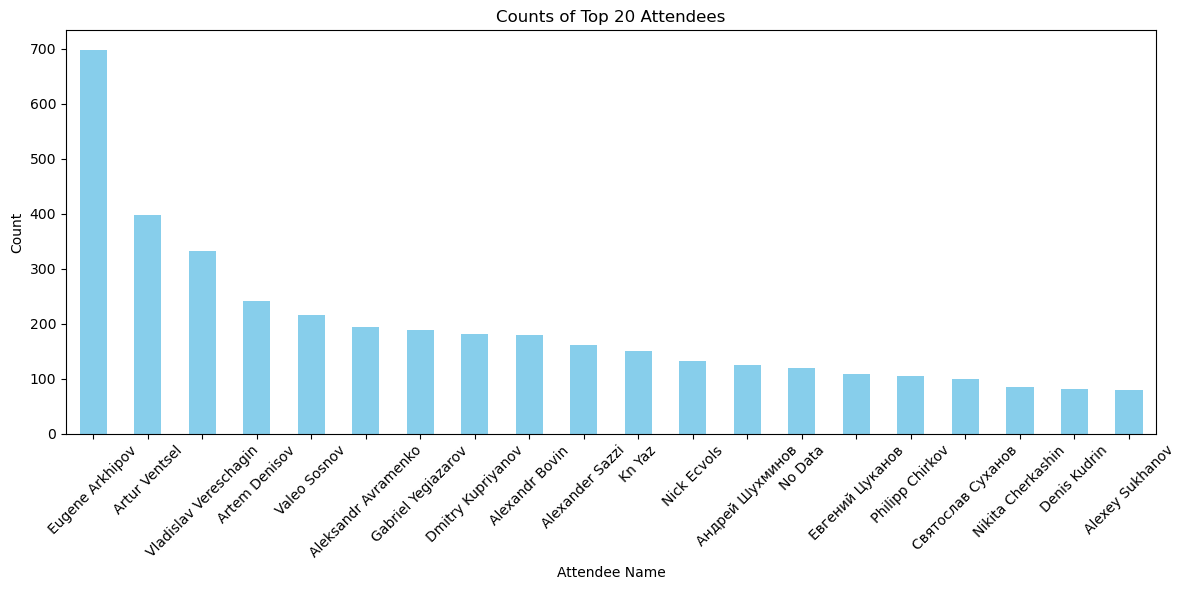

In [19]:
# Assuming you have the 'attendees_count' Series
attendees_count = all_attendees.value_counts()

# Create a bar plot for the top 20 attendees
plt.figure(figsize=(12, 6))
attendees_count[:20].plot(kind='bar', color='skyblue')  # Display the top 20 attendees
plt.title('Counts of Top 20 Attendees')
plt.xlabel('Attendee Name')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


###List of Attendees of team practices/skills practice

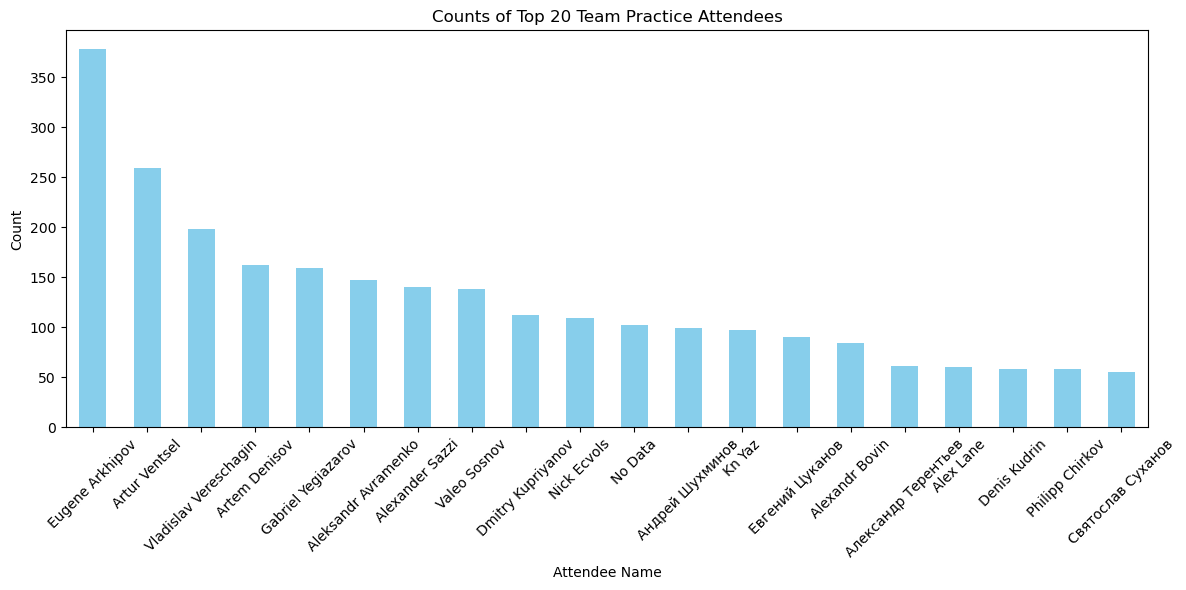

In [20]:
# Filter the DataFrame for 'Team Practice'
team_practice_df = df_att[df_att['Type'] == 'Team Practice']

# Explode and count attendees
team_practice_attendees = team_practice_df['Going'].str.split(', ').explode()
team_practice_attendees_count = team_practice_attendees.value_counts()

# Create a bar plot for the top 20 attendees of 'Team Practice'
plt.figure(figsize=(12, 6))
team_practice_attendees_count[:20].plot(kind='bar', color='skyblue')
plt.title('Counts of Top 20 Team Practice Attendees')
plt.xlabel('Attendee Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


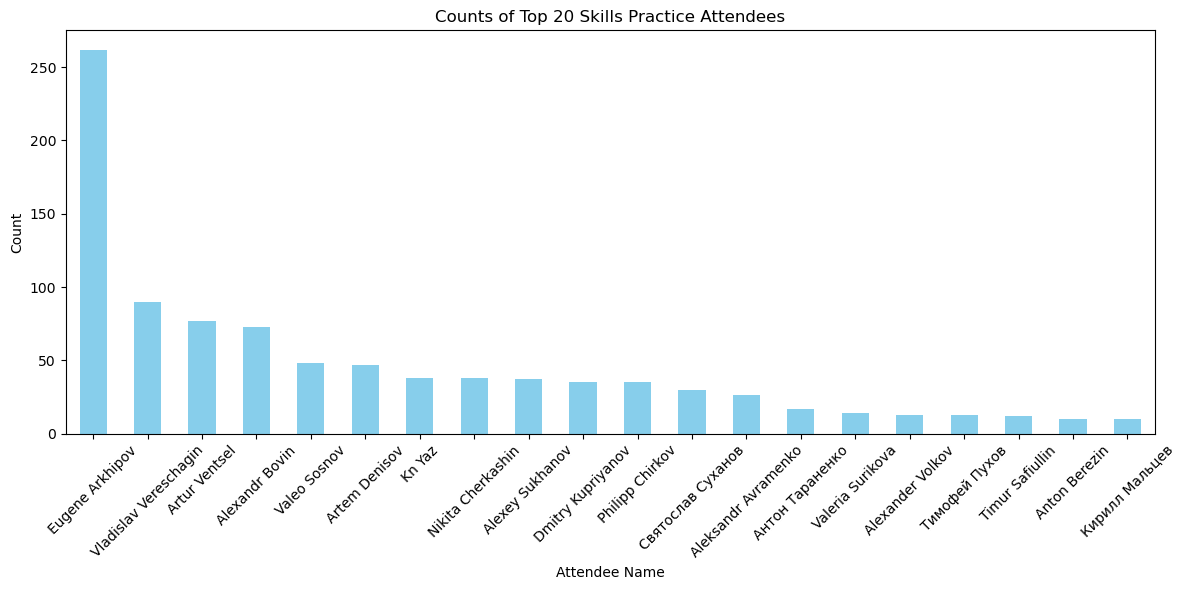

In [21]:
# Filter the DataFrame for 'Skills Practice'
skills_practice_df = df_att[df_att['Type'] == 'Skills Practice']

# Explode and count attendees
skills_practice_attendees = skills_practice_df['Going'].str.split(', ').explode()
skills_practice_attendees_count = skills_practice_attendees.value_counts()

# Create a bar plot for the top 20 attendees of 'Skills Practice'
plt.figure(figsize=(12, 6))
skills_practice_attendees_count[:20].plot(kind='bar', color='skyblue')
plt.title('Counts of Top 20 Skills Practice Attendees')
plt.xlabel('Attendee Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
unique_all_attendees = set(all_attendees)
print("Unique values in all_attendees:")
for attendee in unique_all_attendees:
    print(attendee)

Unique values in all_attendees:
Vladimir Yerakhtorin
50 people responded Going
Mary Shevchenko
Hidenori Morii
Chase Philpot
Aleksandr Avramenko
Anton Podgorny
Alexander Sazzi
Aleksandr Klochkov
Даниил Хромов
Даря Воршева
Александр Самылкин
Alexey Sukhanov
Evgen Soltys
Артём Червоный
Dmitriy Khamin
Jack Stubbs
Лев Щуклинов
Denis Kudrin
Philipp Le
James Evans
Vasily Lavrov
Виктор Апаков
Gio Mushukia
7 people responded Going
Lina Rekubratskaya
Dmitry Ulyanov
4 people responded Going
Kn Yaz
Дмитрий Засов
Ivan Baranoff
Сергей Леонов
8 people responded Going
Valeo Sosnov
Евгений Цуканов
Gus Peters
John Watson
Aaron Luo
Nikita Cherkashin
Nikolay Efimov
11 people responded Going
Ivan Safonov
Alexander Volkov
3 people responded Going
Irina Krez
Eugene Arkhipov
Борис Ремизов
Anton Berezin
Konstantin Kravtsov
Evgeny Zheltikov
Кирилл Мальцев
Daniil Kulik
13 people responded Going
Алексей Бородин
Святослав Суханов
Tony Fernandes
Valeria Surikova
Ruslan Romanov
Valeriy Severukhin
Tuyara Dayan-Pavlov

In [23]:
print(len(unique_all_attendees))

175


In [24]:
print(unique_all_attendees)

{'Vladimir Yerakhtorin', '50 people responded Going', 'Mary Shevchenko', 'Hidenori Morii', 'Chase Philpot', 'Aleksandr Avramenko', 'Anton Podgorny', 'Alexander Sazzi', 'Aleksandr Klochkov', 'Даниил Хромов', 'Даря Воршева', 'Александр Самылкин', 'Alexey Sukhanov', 'Evgen Soltys', 'Артём Червоный', 'Dmitriy Khamin', 'Jack Stubbs', 'Лев Щуклинов', 'Denis Kudrin', 'Philipp Le', 'James Evans', 'Vasily Lavrov', 'Виктор Апаков', 'Gio Mushukia', '7 people responded Going', 'Lina Rekubratskaya', 'Dmitry Ulyanov', '4 people responded Going', 'Kn Yaz', 'Дмитрий Засов', 'Ivan Baranoff', 'Сергей Леонов', '8 people responded Going', 'Valeo Sosnov', 'Евгений Цуканов', 'Gus Peters', 'John Watson', 'Aaron Luo', 'Nikita Cherkashin', 'Nikolay Efimov', '11 people responded Going', 'Ivan Safonov', 'Alexander Volkov', '3 people responded Going', 'Irina Krez', 'Eugene Arkhipov', 'Борис Ремизов', 'Anton Berezin', 'Konstantin Kravtsov', 'Evgeny Zheltikov', 'Кирилл Мальцев', 'Daniil Kulik', '13 people responded

##List of filtered Attendees

In [25]:
filtered_attendees = [attendee for attendee in all_attendees if attendee != "No Data" and len(attendee.split()) <= 3]
unique_attendees = list(set(filtered_attendees))
print("Unique attendees with 2 or 3 words:")
for attendee in unique_attendees:
    print(attendee)


Unique attendees with 2 or 3 words:
Vladimir Yerakhtorin
Mary Shevchenko
Hidenori Morii
Chase Philpot
Aleksandr Avramenko
Anton Podgorny
Alexander Sazzi
Aleksandr Klochkov
Даниил Хромов
Даря Воршева
Александр Самылкин
Alexey Sukhanov
Evgen Soltys
Артём Червоный
Dmitriy Khamin
Jack Stubbs
Лев Щуклинов
Denis Kudrin
Philipp Le
James Evans
Vasily Lavrov
Виктор Апаков
Gio Mushukia
Lina Rekubratskaya
Dmitry Ulyanov
Kn Yaz
Дмитрий Засов
Ivan Baranoff
Сергей Леонов
Valeo Sosnov
Евгений Цуканов
Gus Peters
John Watson
Aaron Luo
Nikita Cherkashin
Nikolay Efimov
Ivan Safonov
Alexander Volkov
Irina Krez
Eugene Arkhipov
Борис Ремизов
Anton Berezin
Konstantin Kravtsov
Evgeny Zheltikov
Кирилл Мальцев
Daniil Kulik
Алексей Бородин
Святослав Суханов
Tony Fernandes
Valeria Surikova
Ruslan Romanov
Valeriy Severukhin
Tuyara Dayan-Pavlova
Мария Три
Charlotte Ridsdale
Stephen Hnery
Cole Russon
Anton Samsonov
Алексей Чернышов
Rowan Staden-Coats
Kenneth Wong
Александр Терентьев
Константин Гуров
Gabriel Yegiazar

In [26]:
print(unique_attendees)

['Vladimir Yerakhtorin', 'Mary Shevchenko', 'Hidenori Morii', 'Chase Philpot', 'Aleksandr Avramenko', 'Anton Podgorny', 'Alexander Sazzi', 'Aleksandr Klochkov', 'Даниил Хромов', 'Даря Воршева', 'Александр Самылкин', 'Alexey Sukhanov', 'Evgen Soltys', 'Артём Червоный', 'Dmitriy Khamin', 'Jack Stubbs', 'Лев Щуклинов', 'Denis Kudrin', 'Philipp Le', 'James Evans', 'Vasily Lavrov', 'Виктор Апаков', 'Gio Mushukia', 'Lina Rekubratskaya', 'Dmitry Ulyanov', 'Kn Yaz', 'Дмитрий Засов', 'Ivan Baranoff', 'Сергей Леонов', 'Valeo Sosnov', 'Евгений Цуканов', 'Gus Peters', 'John Watson', 'Aaron Luo', 'Nikita Cherkashin', 'Nikolay Efimov', 'Ivan Safonov', 'Alexander Volkov', 'Irina Krez', 'Eugene Arkhipov', 'Борис Ремизов', 'Anton Berezin', 'Konstantin Kravtsov', 'Evgeny Zheltikov', 'Кирилл Мальцев', 'Daniil Kulik', 'Алексей Бородин', 'Святослав Суханов', 'Tony Fernandes', 'Valeria Surikova', 'Ruslan Romanov', 'Valeriy Severukhin', 'Tuyara Dayan-Pavlova', 'Мария Три', 'Charlotte Ridsdale', 'Stephen Hner

In [27]:
unique_attendees_count = len(unique_attendees)
print("Count of unique attendees with 2 words:", unique_attendees_count)


Count of unique attendees with 2 words: 150


#Eugene Stats

In [28]:
# Create a new DataFrame containing only the rows where Eugene Arkhipov appears in the Going column
eugene_attendee_df = df_att[df_att['Going'].str.contains('Eugene Arkhipov', na=False)]


In [29]:
print(eugene_attendee_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 131 to 925
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             699 non-null    object        
 1   Status           699 non-null    object        
 2   Type             699 non-null    object        
 3   Creator          699 non-null    object        
 4   Date             699 non-null    object        
 5   Day_Start        699 non-null    object        
 6   Day_End          699 non-null    object        
 7   Month_Start      699 non-null    object        
 8   Month_Finish     699 non-null    object        
 9   Date_Start       699 non-null    int64         
 10  Date_End         699 non-null    int64         
 11  Year             699 non-null    int64         
 12  Time_Start       699 non-null    object        
 13  Duration         699 non-null    object        
 14  Location         699 non-null    object 

In [30]:

# Find the first and last date Eugene Arkhipov attended an event
first_date = eugene_attendee_df['Date_Date_Excel'].min()
last_date = eugene_attendee_df['Date_Date_Excel'].max()



In [31]:
print(first_date)
print(last_date)

2015-05-23 00:00:00
2022-03-19 00:00:00


In [32]:
from dateutil.relativedelta import relativedelta

# Create a new DataFrame containing only the rows within the date range of Eugene Arkhipov's attendance
eugene_time_period_df = df_att[(df_att['Date_Date_Excel'] >= first_date) & (df_att['Date_Date_Excel'] <= last_date)]

# Count the number of events Eugene Arkhipov attended in that time period
events_attended = len(eugene_attendee_df)

# Count the total number of events in the time period
total_events_in_time_period = len(eugene_time_period_df)

# Calculate the percentage of events attended by Eugene Arkhipov
percentage_attended = (events_attended / total_events_in_time_period) * 100

# Assuming you have `first_date` and `last_date` as datetime objects
delta = relativedelta(last_date, first_date)

print(f"Eugene Arkhipov attended {events_attended} events")
print(f"{percentage_attended:.2f}% of total events")
print(f"from {first_date} to {last_date}.")
print(f"He was available to practice for {delta.years} Years, {delta.months} Months, and {delta.days} Days from 2015 to 2022")


Eugene Arkhipov attended 699 events
87.92% of total events
from 2015-05-23 00:00:00 to 2022-03-19 00:00:00.
He was available to practice for 6 Years, 9 Months, and 24 Days from 2015 to 2022


#Time Statistics

In [33]:
all_durations = df_att['Duration']

print(all_durations)

0             Duration: 3 hr
1             Duration: 3 hr
2             Duration: 3 hr
3             Duration: 3 hr
4             Duration: 3 hr
               ...          
921    Duration: 1 hr 30 min
922    Duration: 1 hr 30 min
923    Duration: 1 hr 30 min
924    Duration: 1 hr 30 min
925    Duration: 1 hr 30 min
Name: Duration, Length: 926, dtype: object


In [34]:
# Assuming you already have your DataFrame
unique_durations = df_att['Duration'].unique()

# Print the unique values
print(unique_durations)


['Duration: 3 hr' 'Duration: 2 hr' 'Duration: 2 days' 'Duration: 6 hr'
 'Duration: 4 hr' 'Duration: 3 days' 'Duration: 5 hr'
 'Duration: 1 hr 50 min' 'Duration: 3 hr 30 min' 'Duration: 2 hr 30 min'
 'Duration: 1 hr 30 min' 'Duration: 7 hr' 'Duration: 9 hr'
 'Duration: 8 hr' 'Duration: 1 hr 20 min' 'Duration: 4 days'
 'Duration: 8 hr 30 min' 'Duration: 1 hr' 'Duration: 4 hr 30 min'
 'Duration: 1 hr 59 min']


In [35]:
# Sample duration values from all rows
durations = all_durations

# Define a function to convert a duration string to minutes
def convert_duration_to_minutes(duration_str):
    parts = duration_str.split()
    minutes = 0

    for i in range(len(parts)):
        if parts[i] == 'days':
            minutes += int(parts[i - 1]) * 24 * 60
        elif parts[i] == 'hr':
            minutes += int(parts[i - 1]) * 60
        elif parts[i] == 'min':
            minutes += int(parts[i - 1])

    return minutes

# Convert the duration strings to minutes and sum them
total_minutes = sum([convert_duration_to_minutes(duration) for duration in durations])

# Convert the total minutes back to hours and minutes
total_hours = total_minutes // 60
remaining_minutes = total_minutes % 60

# Print the total duration
print(f"Total Duration: {total_hours} hr {remaining_minutes} min")


Total Duration: 3454 hr 39 min


##Events over Time

###Events per Year

In [36]:
events_per_year = df_att['Year'].value_counts().sort_index()


# Print the total number of events per year
print("Total Events per Year:")
print(events_per_year)


Total Events per Year:
2013     17
2014     83
2015    100
2016    167
2017    137
2018     94
2019     67
2020    125
2021    123
2022     13
Name: Year, dtype: int64


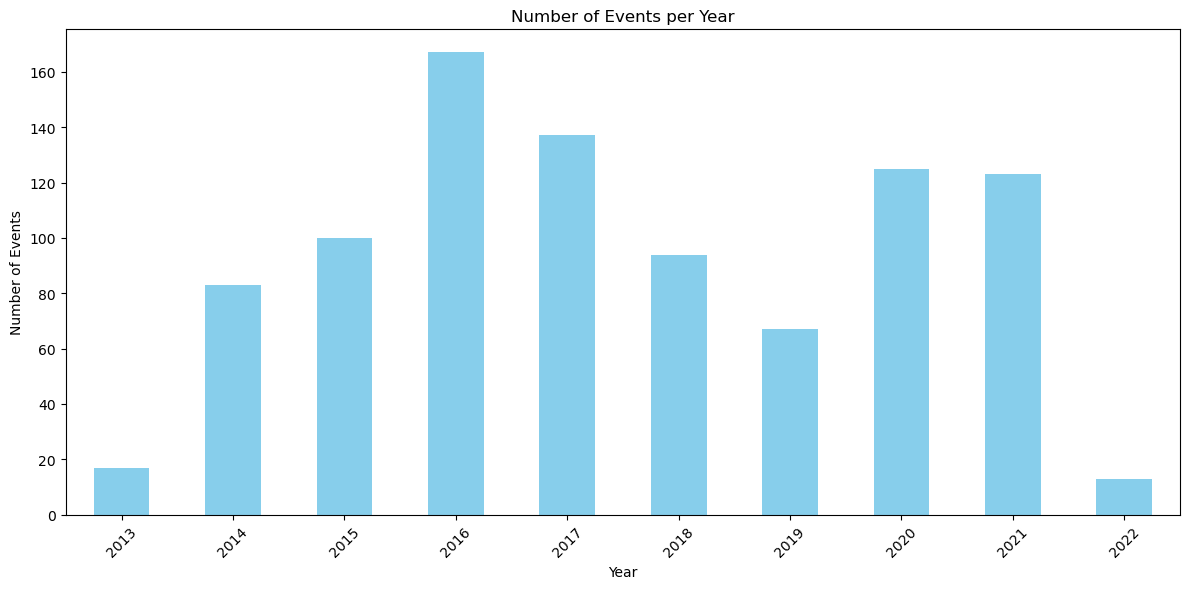

In [37]:
# Sort the values by year
events_per_year = df_att['Year'].value_counts().sort_index()

# Create a bar plot for events per year
plt.figure(figsize=(12, 6))
events_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Events per Year')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###Events per month cumulative

In [94]:
# Create a categorical data type with month names in correct order
months_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
cat_month = pd.Categorical(df_att['Month_Name'], categories=months_order, ordered=True)

# Assign the categorical data to the DataFrame
df_att['Month_Name'] = cat_month

# Group by Month_Name and sum the events
events_per_month = df_att.groupby('Month_Name')['Attendance'].sum()

# Display the sum of events per month in chronological order
print(events_per_month)

Month_Name
January      423
February     554
March        598
April        608
May          704
June         594
July         545
August       617
September    707
October      597
November     581
December     480
Name: Attendance, dtype: int64


In [ ]:
# Create subplots with secondary y-axis
fig = make_subplots(specs=[[{'secondary_y': True}]])

# Add bar chart for total events per month
fig.add_trace(go.Bar(
    x=events_per_month.index,
    y=events_per_month.values,
    name="Total Events per Month",
    text=events_per_month.values, 
    textposition='inside',
    insidetextanchor='end',
    textfont=dict(size=16, color='black'),
    marker=dict(color='skyblue')
), secondary_y=False)

# Set layout for the chart
fig.update_layout(
    xaxis=dict(title='Month'),
    yaxis=dict(title='Total Events', showgrid=False, range=[0, events_per_month.max() + 50]),
    yaxis2=dict(title='Secondary Y-Axis Title', overlaying='y', side='right', showgrid=False),
    legend=dict(x=0.3, y=1, traceorder='normal', orientation='h'),
)

# Display the figure
fig.show()

###Events per year + average events per week

In [38]:
# Assuming 'Date_Date_Excel' is in datetime format
df_att['Year'] = df_att['Date_Date_Excel'].dt.year

# Calculate events per week and add it as a new column
events_per_year = df_att['Year'].value_counts().sort_index().reset_index()
events_per_year.columns = ['Year', 'Total Events']
events_per_year['Events per Week'] = events_per_year.apply(lambda row: row['Total Events'] / 8 if row['Year'] == 2013 else (row['Total Events'] / 11 if row['Year'] == 2022 else row['Total Events'] / 52), axis=1)

# Print the DataFrame to see the new column
print("Total Events per Year:")
print(events_per_year)

Total Events per Year:
   Year  Total Events  Events per Week
0  2013            17         2.125000
1  2014            83         1.596154
2  2015           100         1.923077
3  2016           167         3.211538
4  2017           137         2.634615
5  2018            94         1.807692
6  2019            67         1.288462
7  2020           125         2.403846
8  2021           123         2.365385
9  2022            13         1.181818


Code below doesn't take into account less than 52 weeks in 2013 and 2022    

In [39]:
# Calculate events per week and add it as a new column
#events_per_year = events_per_year.reset_index()
#events_per_year.columns = ['Year', 'Total Events']
#events_per_year['Events per Week'] = events_per_year['Total Events'] / 52


# Print the DataFrame to see the new column
#print("Total Events per Year:")
#print(events_per_year)


In [40]:
print(events_per_year.columns)

Index(['Year', 'Total Events', 'Events per Week'], dtype='object')


In [41]:

# Assuming you have a DataFrame named df_att with columns 'Date_Date_Excel' and 'Total Events'


# Extract year from the 'Date_Date_Excel' column
df_att['Year'] = df_att['Date_Date_Excel'].dt.year

# Calculate the number of weeks in a given year based on the data
weeks_in_year = df_att.groupby('Year')['Date_Date_Excel'].apply(lambda x: ((x.max() - x.min()).days // 7) + 1)

# Merge the weeks_in_year with events_per_year
events_per_year = pd.merge(events_per_year, weeks_in_year, left_on='Year', right_index=True)

# Calculate events per week using the actual number of weeks in that year
events_per_year['Events per Week'] = events_per_year['Total Events'] / events_per_year['Date_Date_Excel']



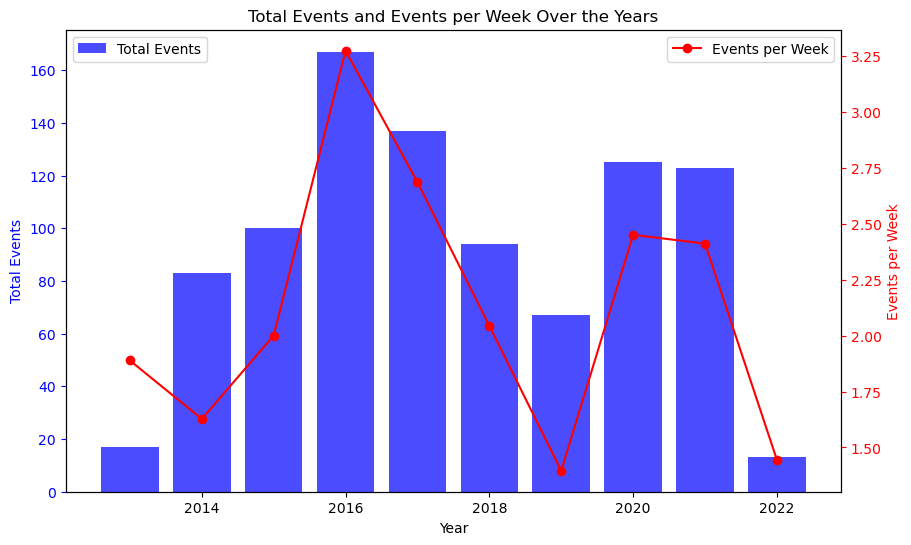

In [42]:
# Create a figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar graph for Total Events
ax1.bar(events_per_year['Year'], events_per_year['Total Events'], color='b', alpha=0.7, label='Total Events')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Events', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis for the line graph
ax2 = ax1.twinx()

# Line graph for Events per Week
ax2.plot(events_per_year['Year'], events_per_year['Events per Week'], color='r', marker='o', label='Events per Week')
ax2.set_ylabel('Events per Week', color='r')
ax2.tick_params('y', colors='r')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Set title and labels
plt.title('Total Events and Events per Week Over the Years')
plt.xlabel('Year')

# Show the plot
plt.show()


###Average events per year

In [43]:
events_per_year = df_att['Year'].value_counts()
average_events_per_year = events_per_year.mean()

# Print the average number of events per year
print("Average Events per Year:", average_events_per_year)


Average Events per Year: 92.6


###Average events per week

In [44]:
# Calculate events per week
events_per_week = average_events_per_year / 52

# Print the result
print("Events per Week:", events_per_week)


Events per Week: 1.7807692307692307


#Macro Attendance Statistics

##Total Attendees per year

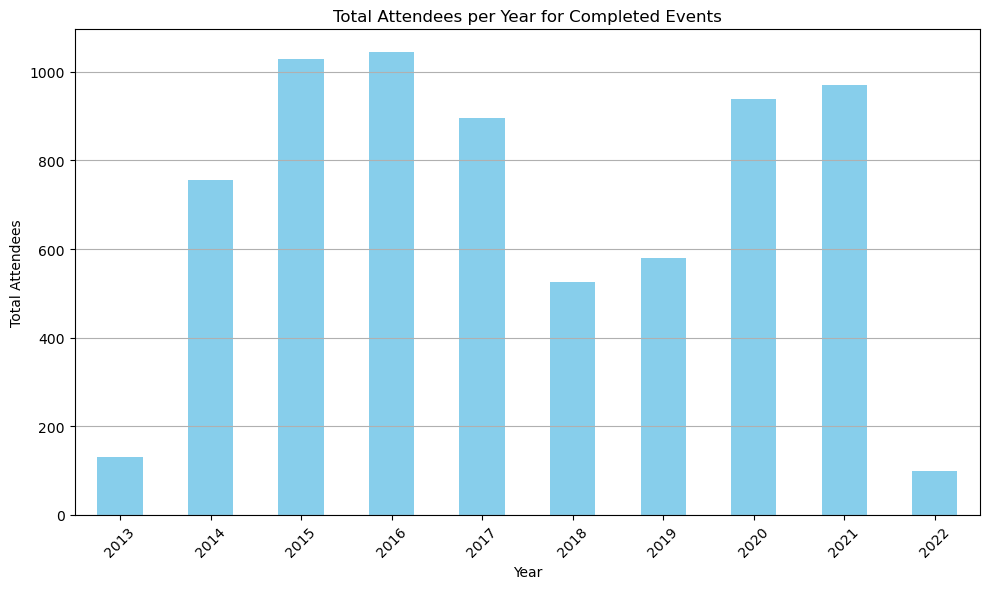

In [45]:
# Filter DataFrame for 'Completed' events
completed_events = df_att[df_att['Status'] == 'Completed']

# Group by year and sum the attendees
total_attendees_per_year = completed_events.groupby('Year')['Attendance'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
total_attendees_per_year.plot(kind='bar', color='skyblue')
plt.title('Total Attendees per Year for Completed Events')
plt.xlabel('Year')
plt.ylabel('Total Attendees')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


##Attendees per event

In [46]:
# Calculate average attendance per event (row)

average_attendance_per_event = df_att[df_att['Status'] == 'Completed']['Attendance'].mean()


# Calculate average attendance per event per year
average_attendance_per_event_per_year = df_att[df_att['Status'] == 'Completed'].groupby('Year')['Attendance'].mean()


# Print the results
print(f"Average Attendance per Event: {average_attendance_per_event}")
print("Average Attendance per Event per Year:")
print(average_attendance_per_event_per_year)


Average Attendance per Event: 7.5832426550598475
Average Attendance per Event per Year:
Year
2013     7.647059
2014     9.108434
2015    10.404040
2016     6.251497
2017     6.540146
2018     5.655914
2019     8.656716
2020     7.688525
2021     7.959016
2022     8.166667
Name: Attendance, dtype: float64


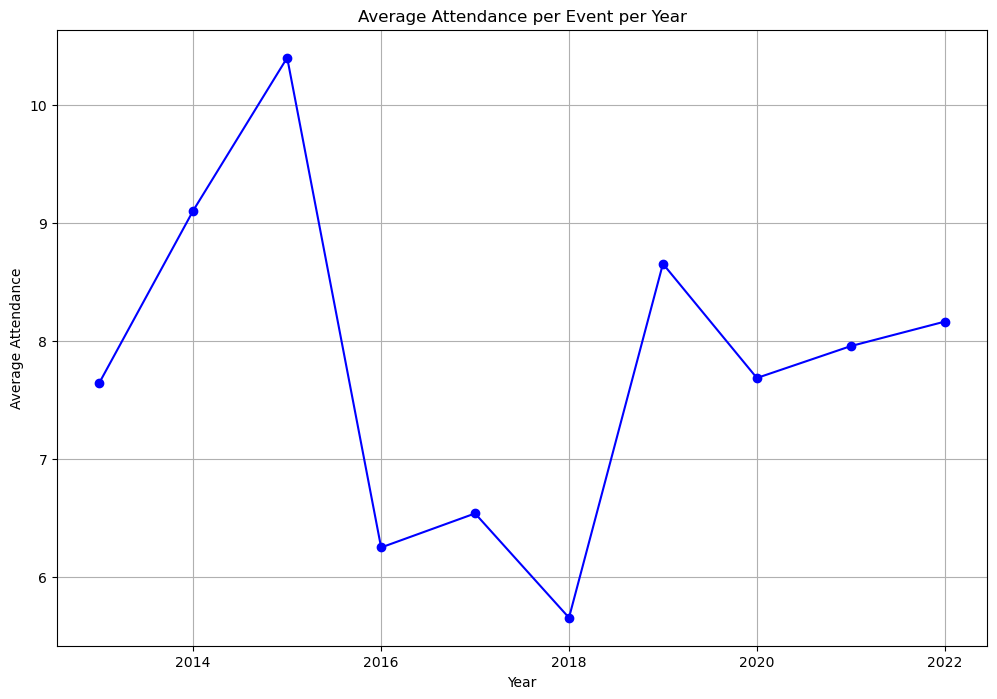

In [47]:
# Plot the data
plt.figure(figsize=(12, 8))
plt.plot(average_attendance_per_event_per_year.index, average_attendance_per_event_per_year, marker='o', linestyle='-', color='b')
plt.title("Average Attendance per Event per Year")
plt.xlabel("Year")
plt.ylabel("Average Attendance")
plt.grid(True)

# Show the plot
plt.show()


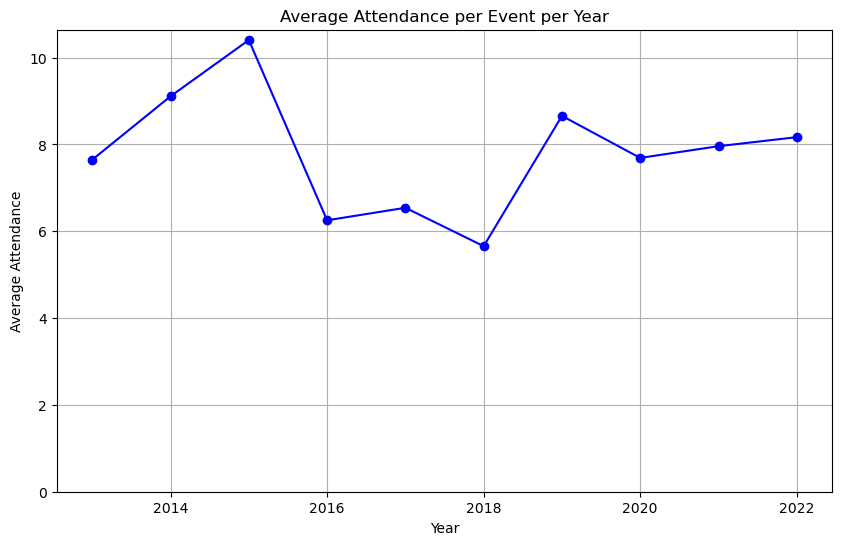

In [48]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(average_attendance_per_event_per_year.index, average_attendance_per_event_per_year, marker='o', linestyle='-', color='b')
plt.title("Average Attendance per Event per Year")
plt.xlabel("Year")
plt.ylabel("Average Attendance")
plt.ylim(0)  # Set the minimum y-value to start at 0
plt.grid(True)

# Show the plot
plt.show()


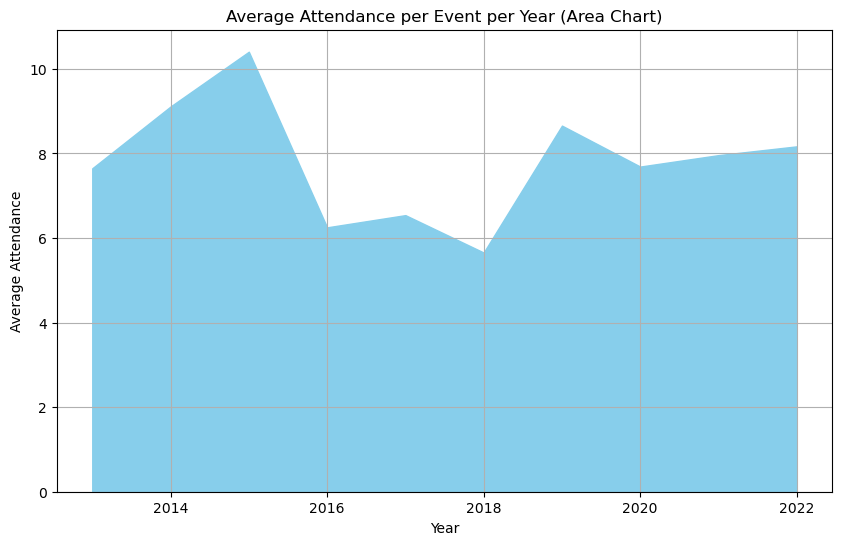

In [49]:
# Plot the data as an area chart
plt.figure(figsize=(10, 6))
plt.fill_between(average_attendance_per_event_per_year.index, average_attendance_per_event_per_year, color='skyblue')
plt.title("Average Attendance per Event per Year (Area Chart)")
plt.xlabel("Year")
plt.ylabel("Average Attendance")
plt.ylim(0)  # Set the minimum y-value to start at 0
plt.grid(True)

# Show the plot
plt.show()


##Total Attendees per Type

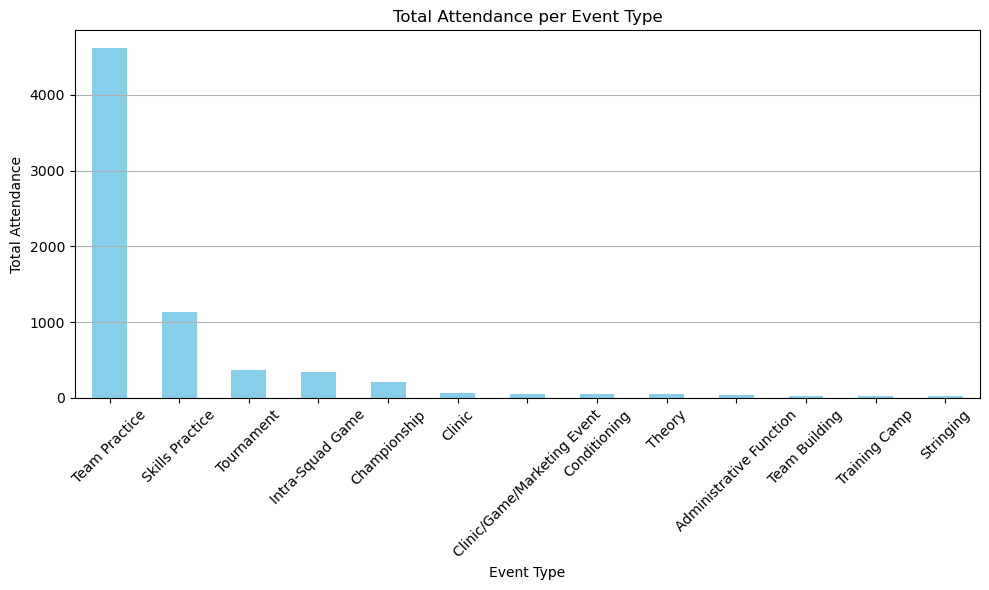

In [50]:
# Calculate total attendance per event type
total_attendance_per_type = df_att.groupby('Type')['Attendance'].sum()

# Sort the total attendance per event type in descending order
total_attendance_per_type = total_attendance_per_type.sort_values(ascending=False)

# Visualize the total attendance per event type in a bar graph
plt.figure(figsize=(10, 6))
total_attendance_per_type.plot(kind='bar', color='skyblue')
plt.title('Total Attendance per Event Type')
plt.xlabel('Event Type')
plt.ylabel('Total Attendance')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


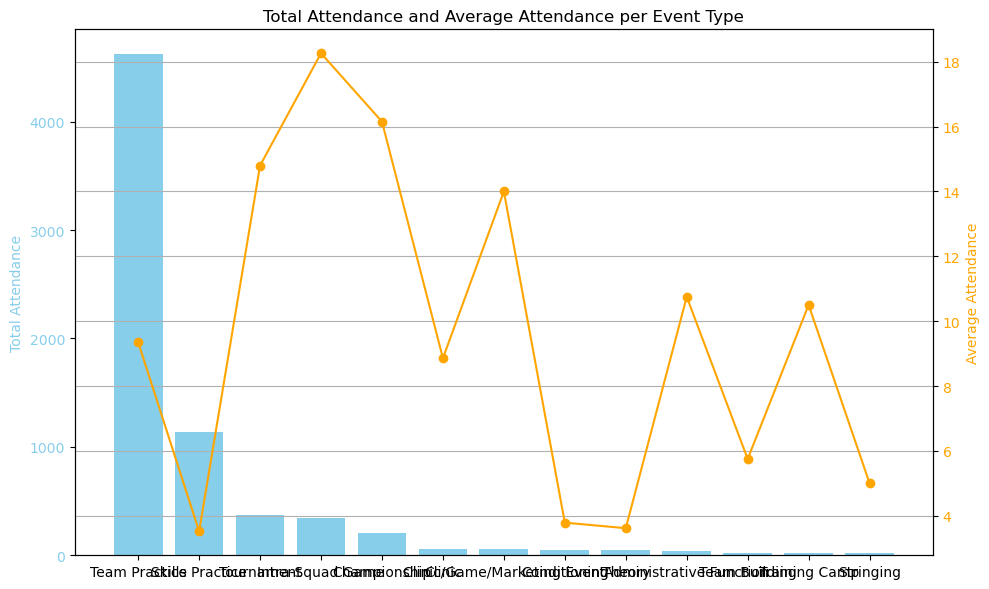

In [51]:

# Calculate total attendance per event type
total_attendance_per_type = df_att.groupby('Type')['Attendance'].sum()

# Sort the total attendance per event type in descending order
total_attendance_per_type = total_attendance_per_type.sort_values(ascending=False)

# Calculate average attendance per event type
average_attendance_per_type = df_att.groupby('Type')['Attendance'].mean()

# Sort the average attendance per event type based on the total attendance order
average_attendance_per_type = average_attendance_per_type.loc[total_attendance_per_type.index]

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the total attendance per event type as a bar chart
ax1.bar(total_attendance_per_type.index, total_attendance_per_type.values, color='skyblue')
ax1.set_ylabel('Total Attendance', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a second y-axis for the line plot
ax2 = ax1.twinx()

# Plot the average attendance per event type as a line chart
ax2.plot(average_attendance_per_type.index, average_attendance_per_type.values, marker='o', color='orange')
ax2.set_ylabel('Average Attendance', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add titles and labels
plt.title('Total Attendance and Average Attendance per Event Type')
plt.xlabel('Event Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels to 45 degrees
plt.grid(axis='y')
plt.tight_layout()
plt.show()

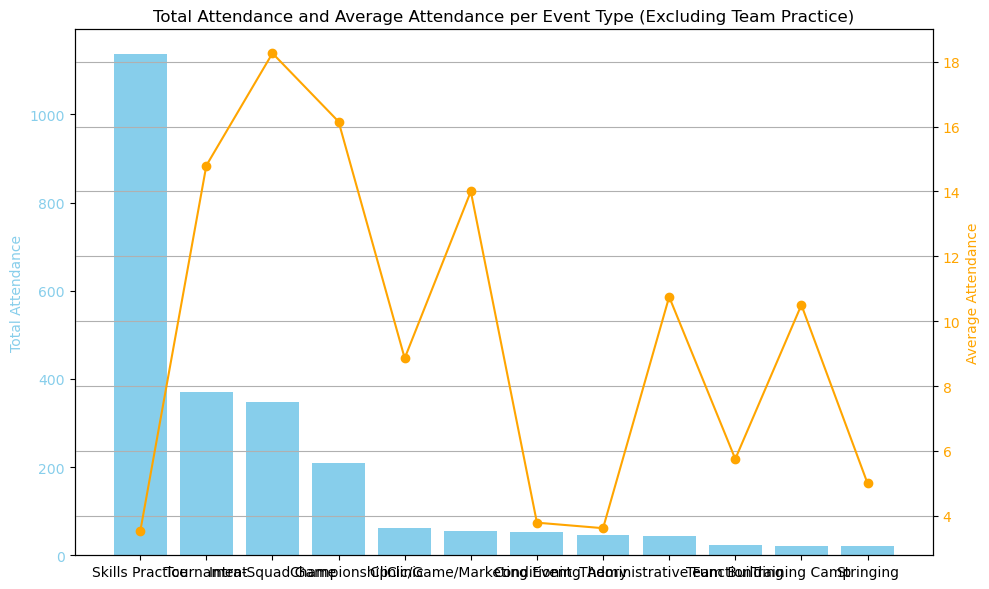

In [52]:

# Exclude 'Team Practice' from the DataFrame
df_excluded = df_att[df_att['Type'] != 'Team Practice']

# Calculate total attendance per event type excluding 'Team Practice'
total_attendance_per_type = df_excluded.groupby('Type')['Attendance'].sum()
total_attendance_per_type = total_attendance_per_type.sort_values(ascending=False)

# Calculate average attendance per event type excluding 'Team Practice'
average_attendance_per_type = df_excluded.groupby('Type')['Attendance'].mean()
average_attendance_per_type = average_attendance_per_type.loc[total_attendance_per_type.index]

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the total attendance per event type as a bar chart
ax1.bar(total_attendance_per_type.index, total_attendance_per_type.values, color='skyblue')
ax1.set_ylabel('Total Attendance', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a second y-axis for the line plot
ax2 = ax1.twinx()

# Plot the average attendance per event type as a line chart
ax2.plot(average_attendance_per_type.index, average_attendance_per_type.values, marker='o', color='orange')
ax2.set_ylabel('Average Attendance', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add titles and labels
plt.title('Total Attendance and Average Attendance per Event Type (Excluding Team Practice)')
plt.xlabel('Event Type')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


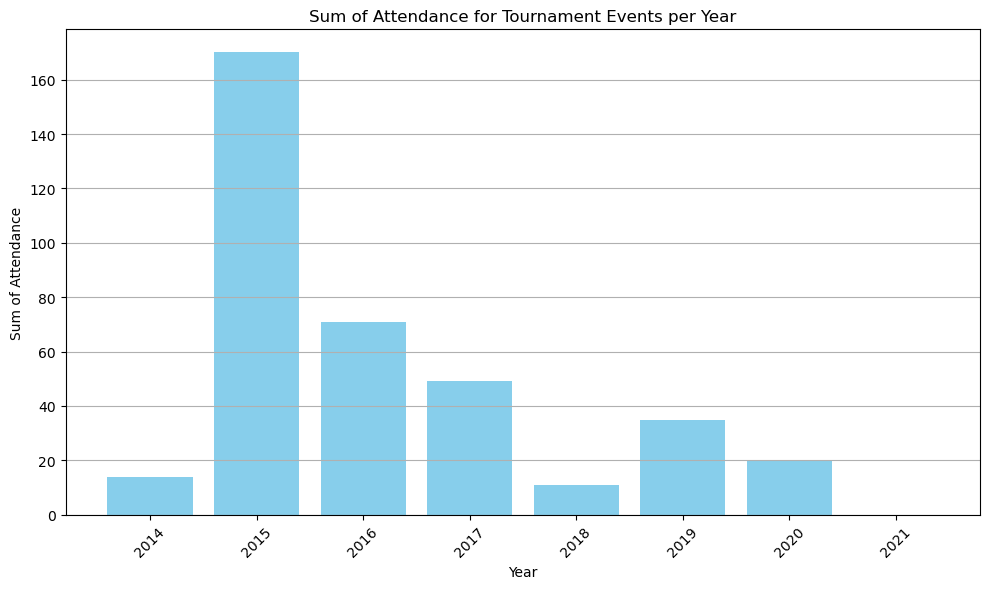

In [53]:
# Filter the DataFrame for Tournament events
tournament_events = df_att[df_att['Type'] == 'Tournament']

# Calculate the sum of attendance for Tournament events per year
sum_attendance_per_year_tournament = tournament_events.groupby('Year')['Attendance'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sum_attendance_per_year_tournament.index, sum_attendance_per_year_tournament.values, color='skyblue')

# Set plot labels and title
plt.title('Sum of Attendance for Tournament Events per Year')
plt.xlabel('Year')
plt.ylabel('Sum of Attendance')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


##Average Attendees per Type

In [54]:
average_attendance_per_type = df_att.groupby('Type')['Attendance'].mean()

# Print the results
print("Average Attendance per Type:")
print(average_attendance_per_type)


Average Attendance per Type:
Type
Administrative Function        10.750000
Championship                   16.153846
Clinic                          8.857143
Clinic/Game/Marketing Event    14.000000
Conditioning                    3.785714
Intra-Squad Game               18.263158
Skills Practice                 3.517028
Stringing                       5.000000
Team Building                   5.750000
Team Practice                   9.352227
Theory                          3.615385
Tournament                     14.800000
Training Camp                  10.500000
Name: Attendance, dtype: float64


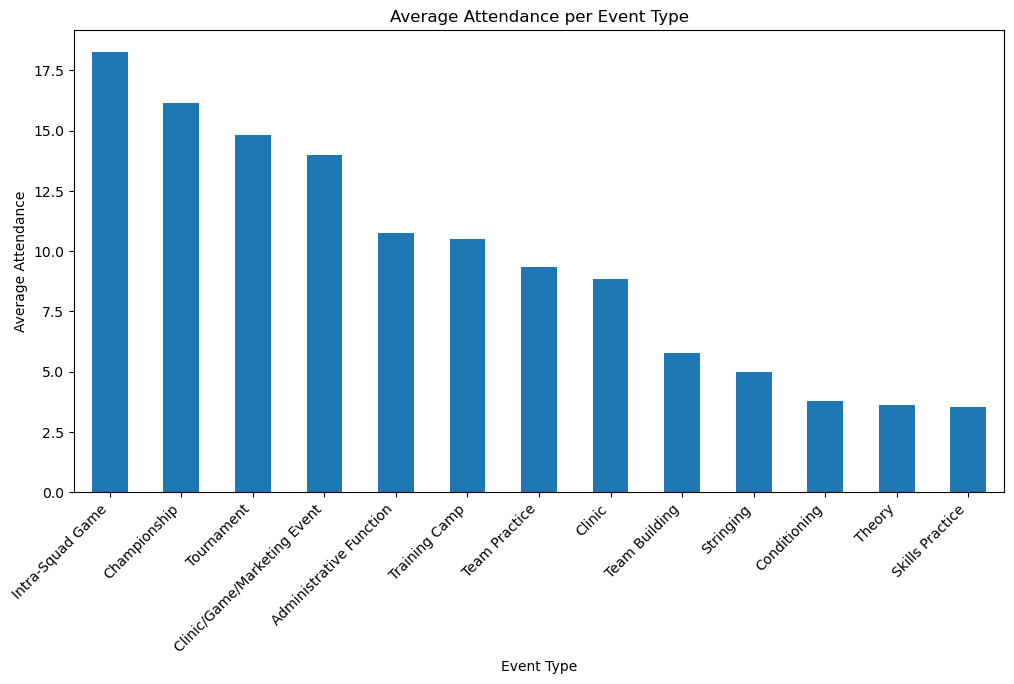

In [55]:
# Calculate average attendance per event type
average_attendance_per_type = df_att.groupby('Type')['Attendance'].mean()
average_attendance_per_type = average_attendance_per_type.sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12, 6))
average_attendance_per_type.plot(kind='bar')
plt.title('Average Attendance per Event Type')
plt.xlabel('Event Type')
plt.ylabel('Average Attendance')
plt.xticks(rotation=45, ha="right")
plt.show()


In [56]:
# Filter for Team Practice events
team_practice_df = df_att[df_att['Type'] == 'Team Practice']

# Calculate average attendance per Team Practice event per year
average_attendance_team_practice_per_year = team_practice_df.groupby('Year')['Attendance'].mean()

# Filter for Skills Practice events
skills_practice_df = df_att[df_att['Type'] == 'Skills Practice']

# Calculate average attendance per Skills Practice event per year
average_attendance_skills_practice_per_year = skills_practice_df.groupby('Year')['Attendance'].mean()

# Filter for Intra-Squad Game events
intra_squad_game_df = df_att[df_att['Type'] == 'Intra-Squad Game']

# Calculate average attendance per Intra-Squad Game event per year
average_attendance_intra_squad_game_per_year = intra_squad_game_df.groupby('Year')['Attendance'].mean()

# Filter for Championship events
championship_df = df_att[df_att['Type'] == 'Championship']

# Calculate average attendance per Championship event per year
average_attendance_championship_per_year = championship_df.groupby('Year')['Attendance'].mean()

# Filter for Tournament events
tournament_df = df_att[df_att['Type'] == 'Tournament']

# Calculate average attendance per Tournament event per year
average_attendance_tournament_per_year = tournament_df.groupby('Year')['Attendance'].mean()


In [57]:

# Print the results
print("Average Attendance per Team Practice per Year:")
print(average_attendance_team_practice_per_year)

print("Average Attendance per Skills Practice per Year:")
print(average_attendance_skills_practice_per_year)

print("Average Attendance per Intra-Squad Game per Year:")
print(average_attendance_intra_squad_game_per_year)

print("Average Attendance per Championship per Year:")
print(average_attendance_championship_per_year)

print("Average Attendance per Tournament per Year:")
print(average_attendance_tournament_per_year)


Average Attendance per Team Practice per Year:
Year
2013     7.647059
2014     8.014286
2015     9.550725
2016     9.393443
2017    11.000000
2018     8.354839
2019    10.023256
2020    11.638298
2021     8.645161
2022     8.153846
Name: Attendance, dtype: float64
Average Attendance per Skills Practice per Year:
Year
2015    7.428571
2016    3.369565
2017    2.706897
2018    3.709091
2019    3.555556
2020    3.630769
2021    2.904762
Name: Attendance, dtype: float64
Average Attendance per Intra-Squad Game per Year:
Year
2014    18.571429
2015    20.000000
2017    10.500000
2020    18.166667
2021    23.500000
Name: Attendance, dtype: float64
Average Attendance per Championship per Year:
Year
2014    11.500000
2015     8.000000
2016    19.000000
2017    22.000000
2018    15.500000
2019    15.666667
2020    17.000000
2021    21.500000
Name: Attendance, dtype: float64
Average Attendance per Tournament per Year:
Year
2014    14.00
2015    17.00
2016    14.20
2017    12.25
2018    11.00
2019

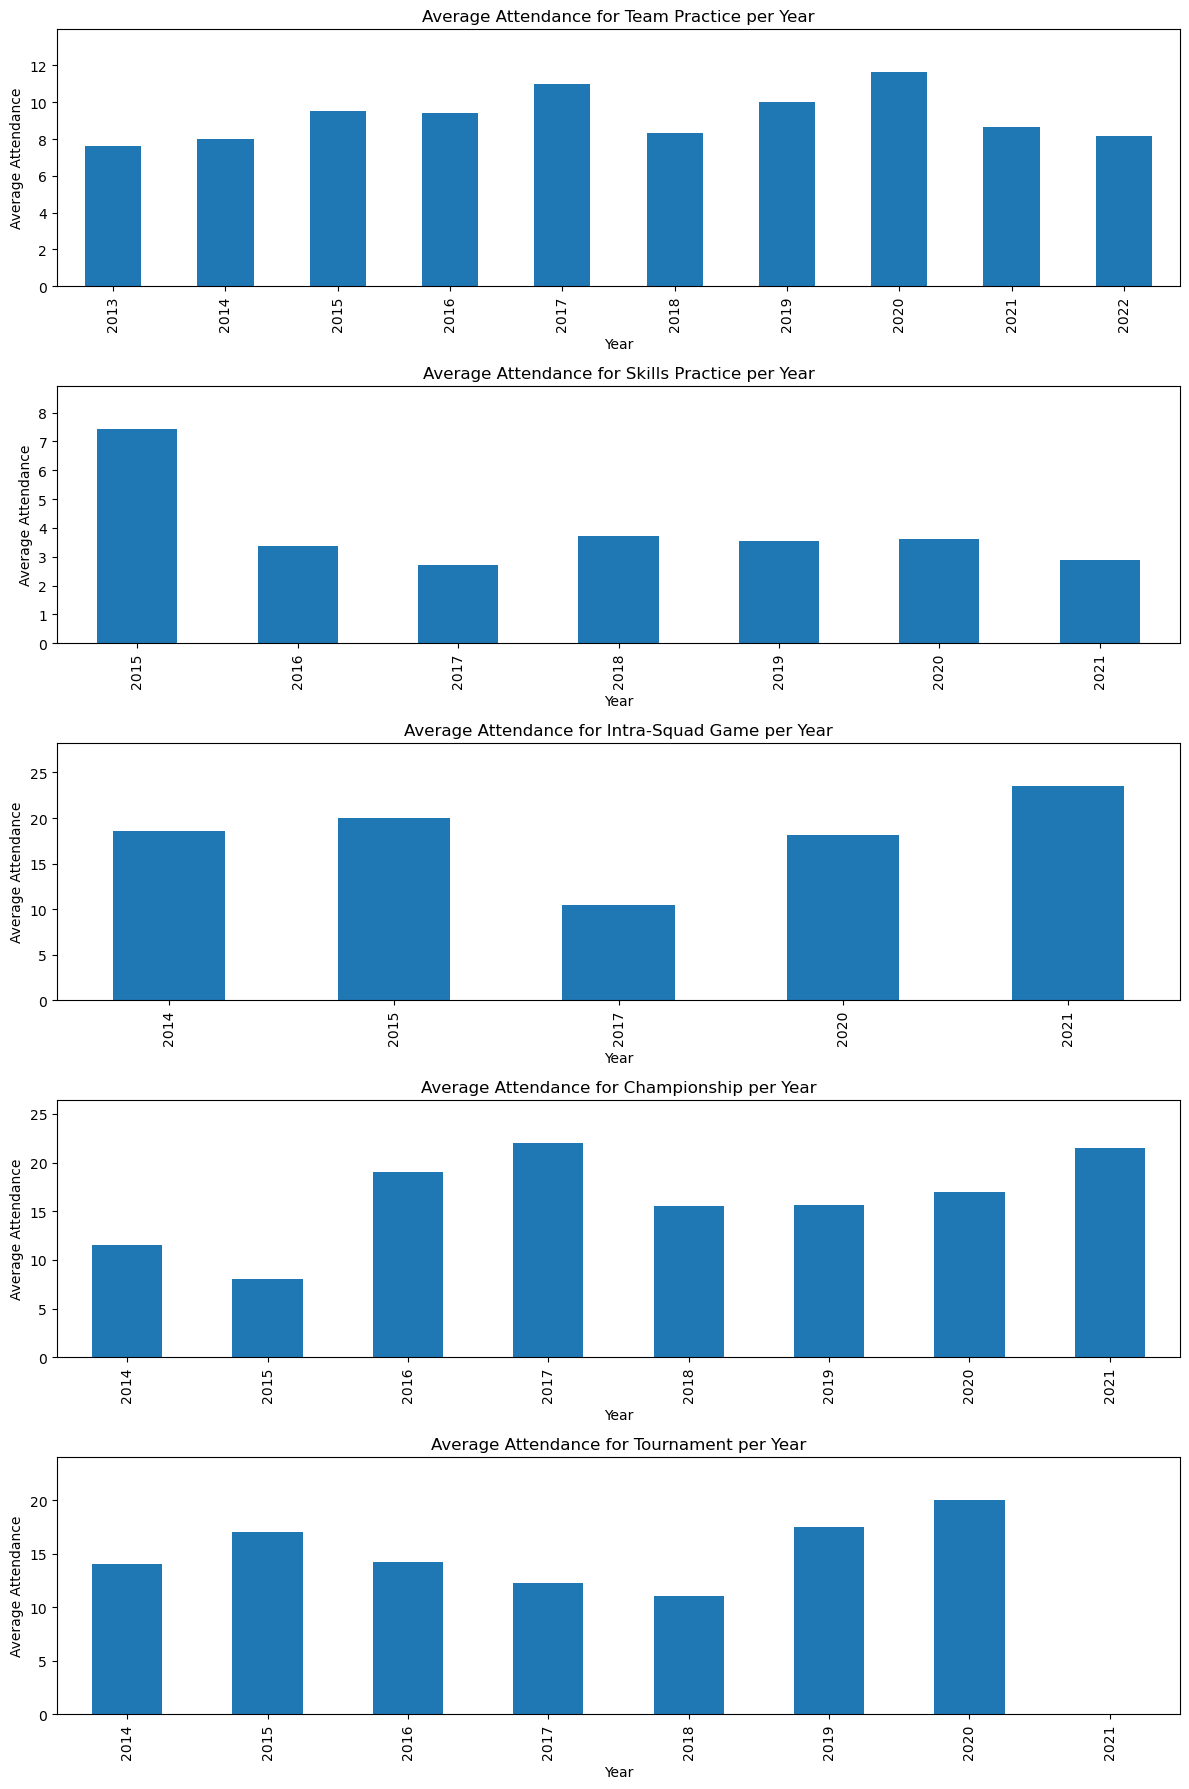

In [58]:

# Create a figure with subplots
fig, axes = plt.subplots(5, 1, figsize=(12, 18))

# Plot Average Attendance per Event Type per Year
average_attendance_team_practice_per_year.plot(kind='bar', ax=axes[0])
axes[0].set_title('Average Attendance for Team Practice per Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average Attendance')
axes[0].set_ylim(0, max(average_attendance_team_practice_per_year) * 1.2)

average_attendance_skills_practice_per_year.plot(kind='bar', ax=axes[1])
axes[1].set_title('Average Attendance for Skills Practice per Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Attendance')
axes[1].set_ylim(0, max(average_attendance_skills_practice_per_year) * 1.2)

average_attendance_intra_squad_game_per_year.plot(kind='bar', ax=axes[2])
axes[2].set_title('Average Attendance for Intra-Squad Game per Year')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Average Attendance')
axes[2].set_ylim(0, max(average_attendance_intra_squad_game_per_year) * 1.2)

average_attendance_championship_per_year.plot(kind='bar', ax=axes[3])
axes[3].set_title('Average Attendance for Championship per Year')
axes[3].set_xlabel('Year')
axes[3].set_ylabel('Average Attendance')
axes[3].set_ylim(0, max(average_attendance_championship_per_year) * 1.2)

average_attendance_tournament_per_year.plot(kind='bar', ax=axes[4])
axes[4].set_title('Average Attendance for Tournament per Year')
axes[4].set_xlabel('Year')
axes[4].set_ylabel('Average Attendance')
axes[4].set_ylim(0, max(average_attendance_tournament_per_year) * 1.2)

# Adjust the layout to prevent overlapping titles
plt.tight_layout()
plt.show()


In [59]:
import plotly.express as px

# Assuming 'Year' is a column in your DataFrame and 'Type' represents different event types
team_practice = df_att[df_att['Type'] == 'Team Practice']
team_practice_per_year = team_practice.groupby('Year')['Attendance'].sum().reset_index()

# Create a bar plot
fig = px.bar(team_practice_per_year, x='Year', y='Attendance', title='Total Team Practice Amounts per Year')
fig.update_layout(xaxis_title='Year', yaxis_title='Total Attendance')
fig.show()


In [60]:
import plotly.graph_objects as go

# Assuming 'Year' is a column in your DataFrame and 'Type' represents different event types
team_practice = df_att[df_att['Type'] == 'Team Practice']
team_practice_per_year = team_practice.groupby('Year')['Attendance'].sum().reset_index()
avg_team_practice_per_week = team_practice.groupby('Year')['Attendance'].mean().reset_index()

fig = go.Figure()

# Bar plot for total team practice amounts per year
fig.add_trace(go.Bar(
    x=team_practice_per_year['Year'],
    y=team_practice_per_year['Attendance'],
    name='Total Attendance',
    marker_color='lightblue'  # Adjust bar color
))

# Line plot for average team practices per week per year
fig.add_trace(go.Scatter(
    x=avg_team_practice_per_week['Year'],
    y=avg_team_practice_per_week['Attendance'],
    name='Average Attendance per Week',
    yaxis='y2',  # Use secondary y-axis
    line=dict(color='orange', width=2)  # Adjust line color and width
))

fig.update_layout(
    title='Total Team Practice Amounts & Average Practice per Week per Year',
    xaxis_title='Year',
    yaxis_title='Total Attendance',
    yaxis2=dict(
        title='Average Attendance per Week',
        overlaying='y',
        side='right'
    )
)

fig.show()


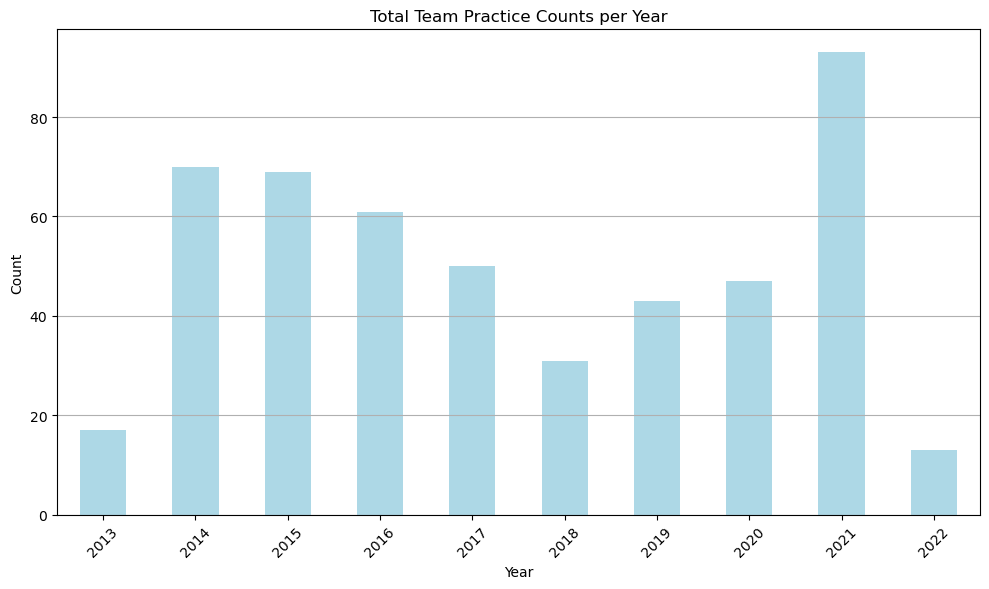

In [61]:
# Assuming df_att is your DataFrame containing the data
team_practice_counts = df_att[df_att['Type'] == 'Team Practice'].groupby('Year').size()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
team_practice_counts.plot(kind='bar', color='lightblue')
plt.title('Total Team Practice Counts per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\mader\AppData\Local\Temp\ipykernel_82072\2872083656.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



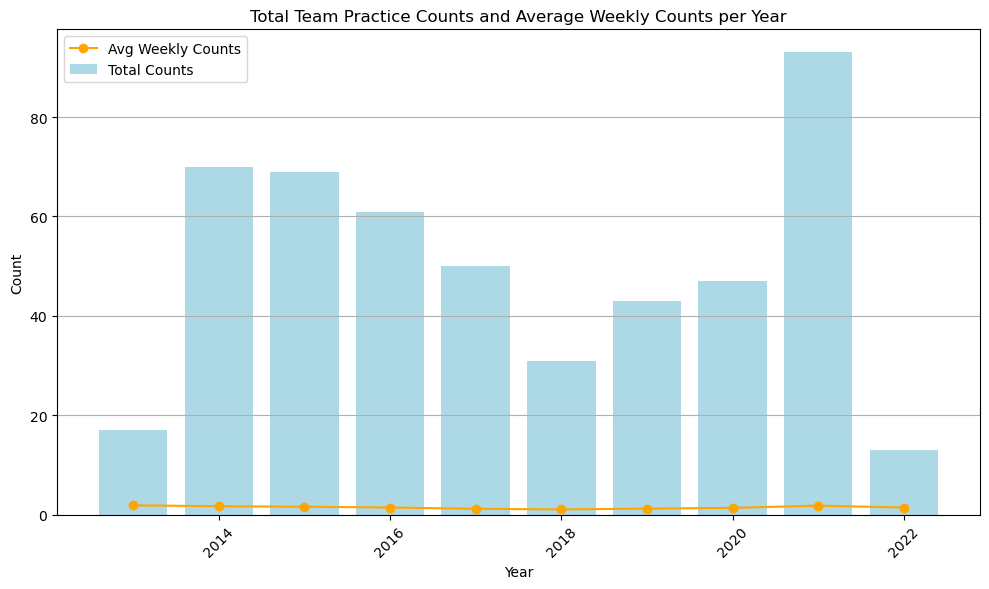

In [62]:

# Assuming df_att is your DataFrame containing the data
team_practice_data = df_att[df_att['Type'] == 'Team Practice']
team_practice_counts = team_practice_data.groupby('Year').size()
df_att['Date_Date_Excel'] = pd.to_datetime(df_att['Date_Date_Excel'], format='%A, %B %d, %Y')
team_practice_data['Week_Number'] = team_practice_data['Date_Date_Excel'].dt.strftime('%U')

average_weekly_counts = team_practice_data.groupby(['Year', 'Week_Number']).size().groupby('Year').mean()

plt.figure(figsize=(10, 6))

# Bar chart for total Team Practice counts per year
plt.bar(team_practice_counts.index, team_practice_counts.values, color='lightblue', label='Total Counts')

# Line chart for average weekly Team Practice counts per year
plt.plot(average_weekly_counts.index, average_weekly_counts.values, marker='o', color='orange', label='Avg Weekly Counts')

plt.title('Total Team Practice Counts and Average Weekly Counts per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


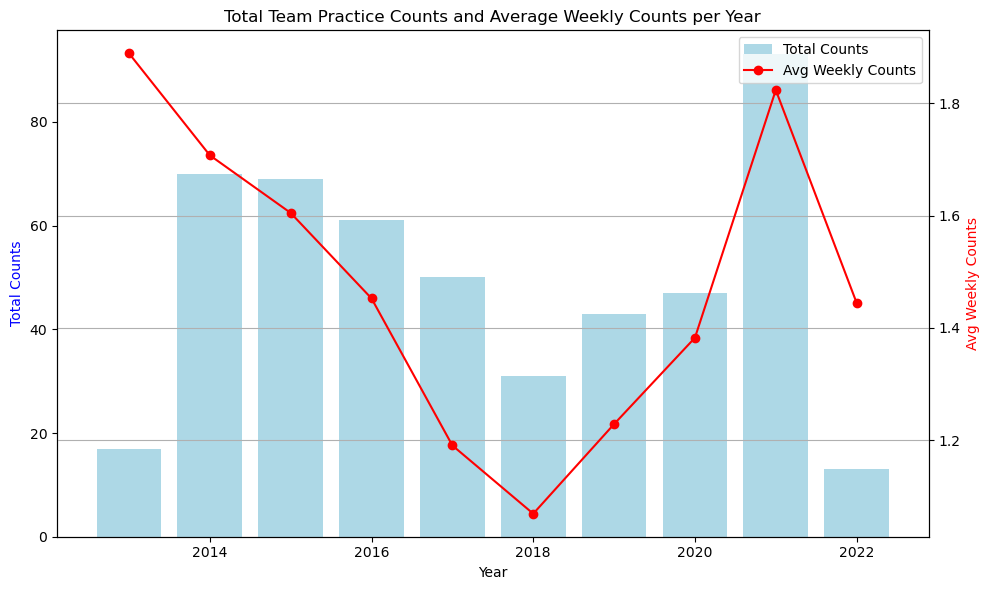

In [63]:
# Assuming df_att is your DataFrame containing the data
team_practice_data = df_att[df_att['Type'] == 'Team Practice'].copy()
team_practice_counts = team_practice_data.groupby('Year').size()
df_att['Date_Date_Excel'] = pd.to_datetime(df_att['Date_Date_Excel'], format='%A, %B %d, %Y')
team_practice_data['Week_Number'] = team_practice_data['Date_Date_Excel'].dt.strftime('%U')

average_weekly_counts = team_practice_data.groupby(['Year', 'Week_Number']).size().groupby('Year').mean()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for total Team Practice counts per year
ax1.bar(team_practice_counts.index, team_practice_counts.values, color='lightblue', label='Total Counts')

ax1.set_xlabel('Year')
ax1.set_ylabel('Total Counts', color='blue')

# Creating a secondary y-axis for the line chart
ax2 = ax1.twinx()
ax2.plot(average_weekly_counts.index, average_weekly_counts.values, marker='o', color='red', label='Avg Weekly Counts')

ax2.set_ylabel('Avg Weekly Counts', color='red')

# Combining legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Total Team Practice Counts and Average Weekly Counts per Year')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


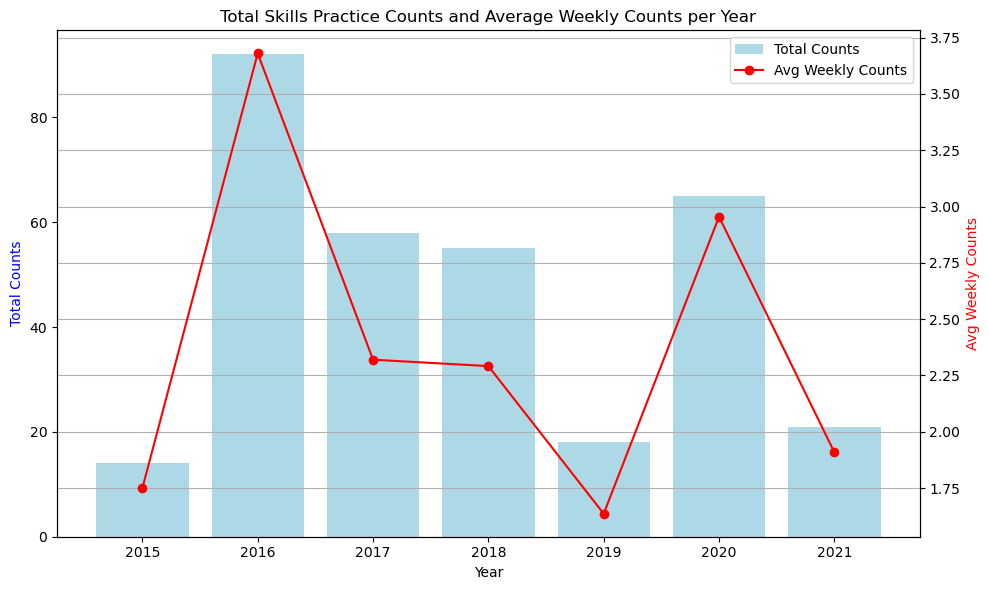

In [64]:
# Assuming df_att is your DataFrame containing the data
skills_practice_data = df_att[df_att['Type'] == 'Skills Practice'].copy()
skills_practice_counts = skills_practice_data.groupby('Year').size()
df_att['Date_Date_Excel'] = pd.to_datetime(df_att['Date_Date_Excel'], format='%A, %B %d, %Y')
skills_practice_data['Week_Number'] = skills_practice_data['Date_Date_Excel'].dt.strftime('%U')

average_weekly_counts = skills_practice_data.groupby(['Year', 'Week_Number']).size().groupby('Year').mean()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for total skills Practice counts per year
ax1.bar(skills_practice_counts.index, skills_practice_counts.values, color='lightblue', label='Total Counts')

ax1.set_xlabel('Year')
ax1.set_ylabel('Total Counts', color='blue')

# Creating a secondary y-axis for the line chart
ax2 = ax1.twinx()
ax2.plot(average_weekly_counts.index, average_weekly_counts.values, marker='o', color='red', label='Avg Weekly Counts')

ax2.set_ylabel('Avg Weekly Counts', color='red')

# Combining legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Total Skills Practice Counts and Average Weekly Counts per Year')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [65]:
# Assuming 'Type' represents different event types and 'Attendance' represents the number of attendees
skills_practice = df_att[df_att['Type'] == 'Skills Practice']
skills_practice_per_year = skills_practice.groupby('Year')['Attendance'].sum().reset_index()

# Create a bar plot
fig = px.bar(skills_practice_per_year, x='Year', y='Attendance', title='Total Skills Practice Amounts per Year')
fig.update_layout(xaxis_title='Year', yaxis_title='Total Attendance')
fig.show()


In [66]:
# Filter the DataFrame for 'Tournament' events
tournament_events = df_att[df_att['Type'] == 'Tournament']

# Compute total attendance per year for Tournament events
total_attendance_per_year_tournament = tournament_events.groupby('Year')['Attendance'].sum()

# Filter the DataFrame for 'Intra-Squad Game' events
intra_squad_events = df_att[df_att['Type'] == 'Intra-Squad Game']

# Compute total attendance per year for Intra-Squad Game events
total_attendance_per_year_intra_squad_game = intra_squad_events.groupby('Year')['Attendance'].sum()

# Calculate average attendance per event per year for Tournament and Intra-Squad Game
average_attendance_tournament_per_year = tournament_events.groupby('Year')['Attendance'].mean()
average_attendance_intra_squad_game_per_year = intra_squad_events.groupby('Year')['Attendance'].mean()

# Calculate the average of the averages
average_combined = (average_attendance_tournament_per_year + average_attendance_intra_squad_game_per_year) / 2

print(average_attendance_tournament_per_year)
print(average_attendance_intra_squad_game_per_year)
print(average_combined)

Year
2014    14.00
2015    17.00
2016    14.20
2017    12.25
2018    11.00
2019    17.50
2020    20.00
2021     0.00
Name: Attendance, dtype: float64
Year
2014    18.571429
2015    20.000000
2017    10.500000
2020    18.166667
2021    23.500000
Name: Attendance, dtype: float64
Year
2014    16.285714
2015    18.500000
2016          NaN
2017    11.375000
2018          NaN
2019          NaN
2020    19.083333
2021    11.750000
Name: Attendance, dtype: float64


In [67]:
# Filter the DataFrame for 'Tournament' events
tournament_events = df_att[df_att['Type'] == 'Tournament']

# Compute total attendance per year for Tournament events
total_attendance_per_year_tournament = tournament_events.groupby('Year')['Attendance'].sum()
    

# Filter the DataFrame for 'Intra-Squad Game' events
intra_squad_events = df_att[df_att['Type'] == 'Intra-Squad Game']

# Compute total attendance per year for Intra-Squad Game events
total_attendance_per_year_intra_squad_game = intra_squad_events.groupby('Year')['Attendance'].sum()


# Concatenate the two dataframes
combined_events = pd.concat([intra_squad_events, tournament_events])

print(combined_events)


                                                  Name     Status  \
31                           Cold War II/The Long Thaw  Completed   
39                          Cold War 3 - Slavic Spring  Completed   
50                               Slavic Spring (V-Day)  Completed   
58                     Infernal Conflict (Heat Rising)  Completed   
77                                     The Early Frost  Completed   
80                                    The Northern War  Completed   
99                            Cold War. Klaus revenge.  Completed   
101                     Cold War. The Emperors Return.  Completed   
109                         Cold War: Miracle on Wood.  Completed   
458                                 Игра в Сокольниках  Completed   
487                   Box lacrosse на Рогова 1 октября  Completed   
701                             Внутрикомандный турнир  Completed   
747                             Внутрикомандный турнир  Completed   
765                  Внутрикомандн

In [68]:
average_combined = combined_events.groupby('Year')['Attendance'].mean()

print(average_combined)


Year
2014    18.000000
2015    17.500000
2016    14.200000
2017    11.666667
2018    11.000000
2019    17.500000
2020    18.428571
2021    15.666667
Name: Attendance, dtype: float64


In [69]:
fig = go.Figure()    

# Add bar chart for total attendance - Tournament
fig.add_trace(go.Bar(
    x=total_attendance_per_year_tournament.index,
    y=total_attendance_per_year_tournament.values,
    marker=dict(color='lightblue'),
    text=total_attendance_per_year_tournament.values,
    textposition='inside',
    textfont=dict(size=16, color='black'),
    name='Tournament Attendance'
))

# Add bar chart for Intra-Squad Game attendance, stacked on top of Tournament attendance
fig.add_trace(go.Bar(
    x=total_attendance_per_year_intra_squad_game.index,
    y=total_attendance_per_year_intra_squad_game.values,
    marker=dict(color='aqua'),
    text=total_attendance_per_year_intra_squad_game.values,
    textposition='inside',
    textfont=dict(size=16, color='black'),
    name='Intra-Squad Game Attendance'
))




# Add line chart for the average of Tournament and Intra-Squad Game attendance
fig.add_trace(go.Scatter(
    x=average_combined.index,
    y=average_combined.values,
    mode='lines+markers+text',
    name='Avg Combined Attendance',
    marker=dict(color='rgba(255, 0, 0, 0.7)', size=10),
    text=average_combined.values.round(1),
    textposition='top center',
    textfont=dict(size=16, color='red'),
    yaxis='y2'
))

     

fig.update_layout(
    xaxis=dict(title='Year'),
    yaxis=dict(showgrid=False, range=[0, 250], showticklabels=False, showline=False),
    yaxis2=dict(overlaying='y', side='right', showgrid=False, range=[0, 40], showticklabels=False, showline=False),
    legend=dict(x=0.7, y=.99, traceorder='normal', orientation='h'),
    barmode='stack'  # Stacked bar mode
)

fig.show()


##Availability = time from first to last event attended

In [70]:
# List to store results
availability_days_data = []

# Loop through unique attendees
for attendee in unique_attendees:
    # Filter the DataFrame to select rows where the attendee's name is in the "Going" column
    attendee_events = df_att[df_att['Going'].str.contains(attendee, case=False)]

    # Calculate the total time available for this attendee
    if len(attendee_events) > 0:
        start_date = attendee_events["Date_Date_Excel"].min()
        end_date = attendee_events["Date_Date_Excel"].max()
        total_days = (end_date - start_date).days

        availability_days_data.append([attendee, total_days])

# Create a new DataFrame to display the results
availability_df = pd.DataFrame(availability_days_data, columns=["Name", "Availability"])

# Print the DataFrame
print(availability_df)


                     Name  Availability
0    Vladimir Yerakhtorin          2477
1         Mary Shevchenko           274
2          Hidenori Morii            92
3           Chase Philpot           941
4     Aleksandr Avramenko          2478
..                    ...           ...
145     Лера Полежаевская            42
146   Анастасия Кухтерина            40
147           Антон Антон             0
148         Мила Бородина           335
149        Михаил Рогачев            22

[150 rows x 2 columns]


In [71]:
# List to store results
availability_data = []

# Loop through unique attendees
for attendee in unique_attendees:
    # Filter the DataFrame to select rows where the attendee's name is in the "Going" column
    attendee_events = df_att[df_att['Going'].str.contains(attendee, case=False)]

    # Calculate the total time available for this attendee
    if len(attendee_events) > 0:
        start_date = attendee_events["Date_Date_Excel"].min()
        end_date = attendee_events["Date_Date_Excel"].max()
        total_days = (end_date - start_date).days

        availability_data.append([attendee, total_days])

# Create a new DataFrame to display the results
availability_df = pd.DataFrame(availability_data, columns=["Name", "Availability"])

# Print the DataFrame
print(availability_df)


                     Name  Availability
0    Vladimir Yerakhtorin          2477
1         Mary Shevchenko           274
2          Hidenori Morii            92
3           Chase Philpot           941
4     Aleksandr Avramenko          2478
..                    ...           ...
145     Лера Полежаевская            42
146   Анастасия Кухтерина            40
147           Антон Антон             0
148         Мила Бородина           335
149        Михаил Рогачев            22

[150 rows x 2 columns]


In [72]:
# List to store results
availability_data = []

# Loop through unique attendees
for attendee in unique_attendees:
    # Filter the DataFrame to select rows where the attendee's name is in the "Going" column
    attendee_events = df_att[df_att['Going'].str.contains(attendee, case=False)]

    # Calculate the total number of attendee events
    total_attendee_events = len(attendee_events)

    # Calculate the first and last appearance
    first_appearance = attendee_events['Date_Date_Excel'].min()
    last_appearance = attendee_events['Date_Date_Excel'].max()

    # Filter the DataFrame to select rows where the event date is within the first and last appearance for the attendee
    possible_attendee_events = df_att[(df_att['Date_Date_Excel'] >= first_appearance) & (df_att['Date_Date_Excel'] <= last_appearance)]

    # Calculate the total number of possible attendee events
    total_possible_attendee_events = len(possible_attendee_events)

    availability_data.append([attendee, total_attendee_events, total_possible_attendee_events])

# Create a new DataFrame to display the results
availability_df = pd.DataFrame(availability_data, columns=["Name", "Events_Attended", "Availability"])

# Print the DataFrame
print(availability_df)



                     Name  Events_Attended  Availability
0    Vladimir Yerakhtorin               60           790
1         Mary Shevchenko               21           107
2          Hidenori Morii                3            16
3           Chase Philpot                5           358
4     Aleksandr Avramenko              194           793
..                    ...              ...           ...
145     Лера Полежаевская                5            41
146   Анастасия Кухтерина               10            17
147           Антон Антон                1             1
148         Мила Бородина                4            90
149        Михаил Рогачев                2            13

[150 rows x 3 columns]


##Availablitity + Events Attended + (Total Events Attended/Availability)

In [73]:
# Add a new column for the percentage of events attended
availability_df["Attendance_Percentage"] = (availability_df["Events_Attended"] / availability_df["Availability"]) * 100

# Print the DataFrame with the new column
print(availability_df)


                     Name  Events_Attended  Availability  \
0    Vladimir Yerakhtorin               60           790   
1         Mary Shevchenko               21           107   
2          Hidenori Morii                3            16   
3           Chase Philpot                5           358   
4     Aleksandr Avramenko              194           793   
..                    ...              ...           ...   
145     Лера Полежаевская                5            41   
146   Анастасия Кухтерина               10            17   
147           Антон Антон                1             1   
148         Мила Бородина                4            90   
149        Михаил Рогачев                2            13   

     Attendance_Percentage  
0                 7.594937  
1                19.626168  
2                18.750000  
3                 1.396648  
4                24.464061  
..                     ...  
145              12.195122  
146              58.823529  
147             10

In [74]:
# Sort the DataFrame by "Attendance_Percentage" in descending order
sorted_availability_df = availability_df.sort_values(by="Attendance_Percentage", ascending=False)

# Print the sorted DataFrame
print(sorted_availability_df)


                    Name  Events_Attended  Availability  Attendance_Percentage
74         Artem Smirnov                1             1             100.000000
113      Alisa Tsvetkova                1             1             100.000000
124    Надежда Обрезкова                4             4             100.000000
40         Борис Ремизов                1             1             100.000000
28         Сергей Леонов                1             1             100.000000
..                   ...              ...           ...                    ...
70         Андрей Потеха                5           404               1.237624
134       George Rusinov                7           570               1.228070
90             Ildar Isa                5           415               1.204819
117  Татьяна Стародубова                4           344               1.162791
75                 Ее Ее                3           428               0.700935

[150 rows x 4 columns]


In [75]:
# Filter the DataFrame to include only rows with 10 or more events attended
filtered_availability_df = availability_df[availability_df["Events_Attended"] >= 10]

# Sort the filtered DataFrame by "Attendance_Percentage" in descending order
sorted_filtered_availability_df = filtered_availability_df.sort_values(by="Attendance_Percentage", ascending=False)

# Print the sorted and filtered DataFrame
print(sorted_filtered_availability_df)


                     Name  Events_Attended  Availability  \
39        Eugene Arkhipov              699           795   
25                 Kn Yaz              151           244   
146   Анастасия Кухтерина               10            17   
58       Алексей Чернышов               10            18   
49       Valeria Surikova               35            69   
..                    ...              ...           ...   
42    Konstantin Kravtsov               26           603   
141  Konstantin Kologriev               28           772   
99     Nikita Konogorskiy               11           304   
51     Valeriy Severukhin               21           685   
26          Дмитрий Засов               10           401   

     Attendance_Percentage  
39               87.924528  
25               61.885246  
146              58.823529  
58               55.555556  
49               50.724638  
..                     ...  
42                4.311774  
141               3.626943  
99                

In [76]:
# Filter the DataFrame to include only rows with 5 or more events attended
filtered_availability_df = availability_df[availability_df["Events_Attended"] >= 5]

# Sort the filtered DataFrame by "Attendance_Percentage" in descending order
sorted_filtered_availability_df = filtered_availability_df.sort_values(by="Attendance_Percentage", ascending=False)

# Print only the "Name" and "Attendance_Percentage" columns
print(sorted_filtered_availability_df[["Name", "Attendance_Percentage"]])


                    Name  Attendance_Percentage
39       Eugene Arkhipov              87.924528
50        Ruslan Romanov              75.000000
27         Ivan Baranoff              75.000000
25                Kn Yaz              61.885246
146  Анастасия Кухтерина              58.823529
..                   ...                    ...
26         Дмитрий Засов               2.493766
3          Chase Philpot               1.396648
70         Андрей Потеха               1.237624
134       George Rusinov               1.228070
90             Ildar Isa               1.204819

[92 rows x 2 columns]


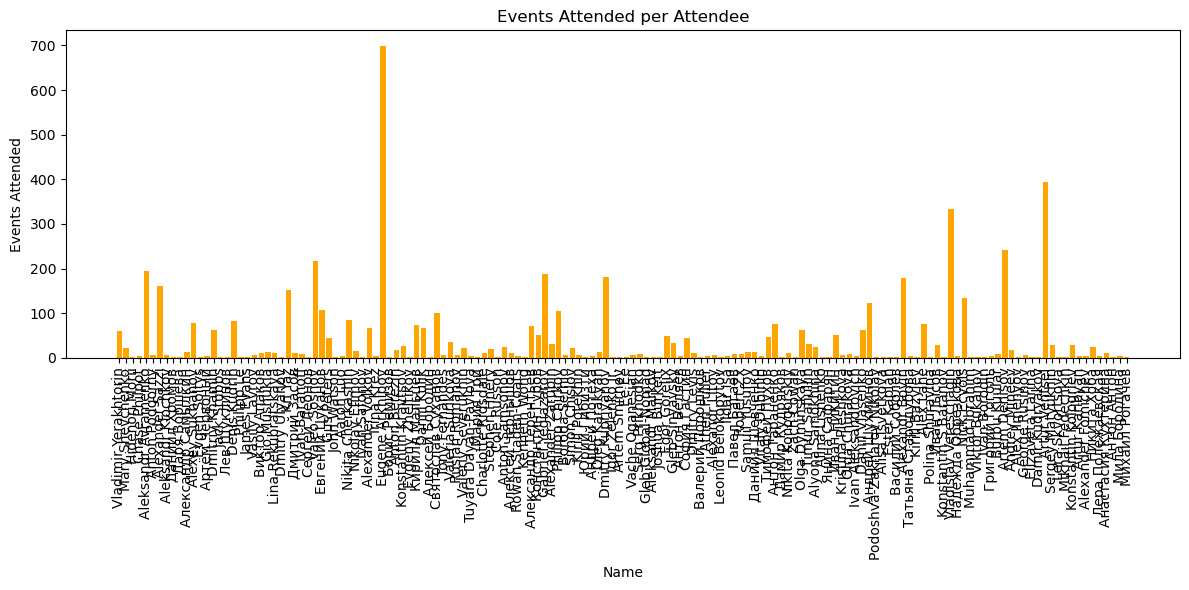

In [77]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar chart for Events_Attended
plt.bar(availability_df['Name'], availability_df['Events_Attended'], color='orange')

# Customize the plot
plt.xlabel('Name')
plt.ylabel('Events Attended')
plt.title('Events Attended per Attendee')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()


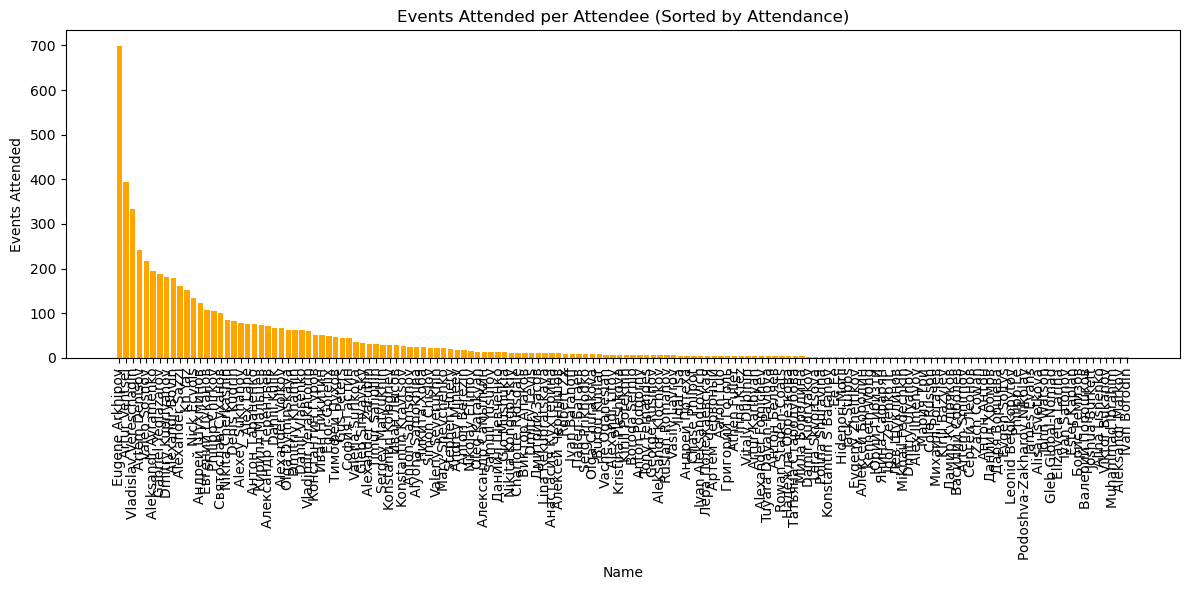

In [78]:
# Sort the DataFrame by Events Attended in descending order
sorted_availability_df = availability_df.sort_values(by='Events_Attended', ascending=False)

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar chart for Events Attended
plt.bar(sorted_availability_df['Name'], sorted_availability_df['Events_Attended'], color='orange')

# Customize the plot
plt.xlabel('Name')
plt.ylabel('Events Attended')
plt.title('Events Attended per Attendee (Sorted by Attendance)')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()



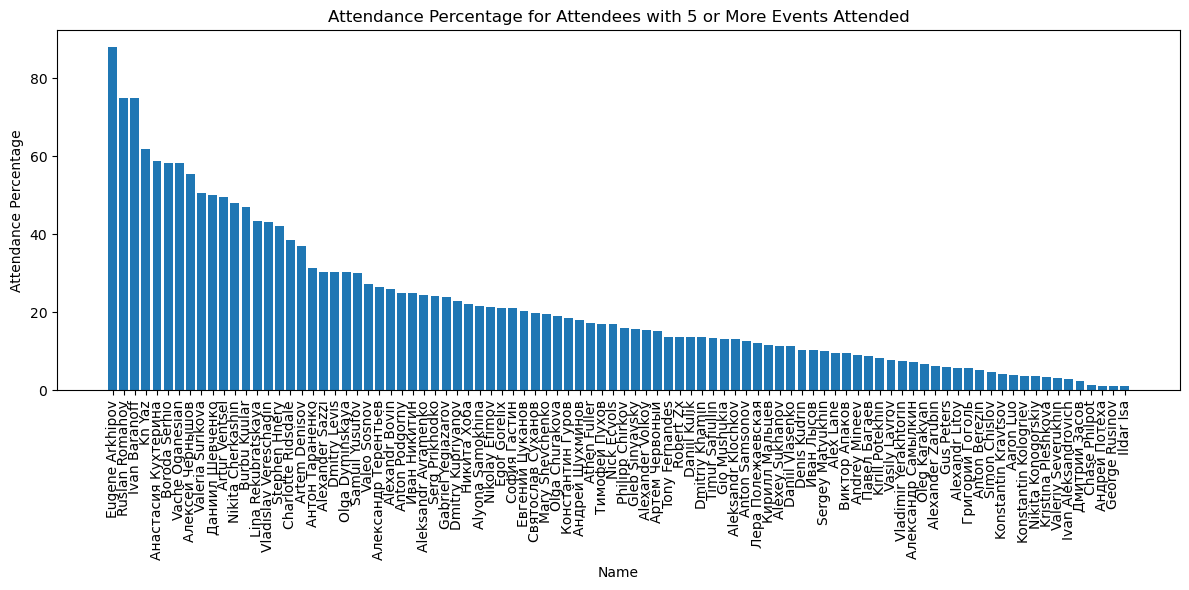

In [79]:
# Filter the DataFrame to include only rows with 5 or more events attended
filtered_availability_df = availability_df[availability_df["Events_Attended"] >= 5]

# Sort the filtered DataFrame by "Attendance_Percentage" in descending order
sorted_filtered_availability_df = filtered_availability_df.sort_values(by="Attendance_Percentage", ascending=False)

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(sorted_filtered_availability_df["Name"], sorted_filtered_availability_df["Attendance_Percentage"])
plt.xlabel("Name")
plt.ylabel("Attendance Percentage")
plt.title("Attendance Percentage for Attendees with 5 or More Events Attended")
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


###Same result, different code

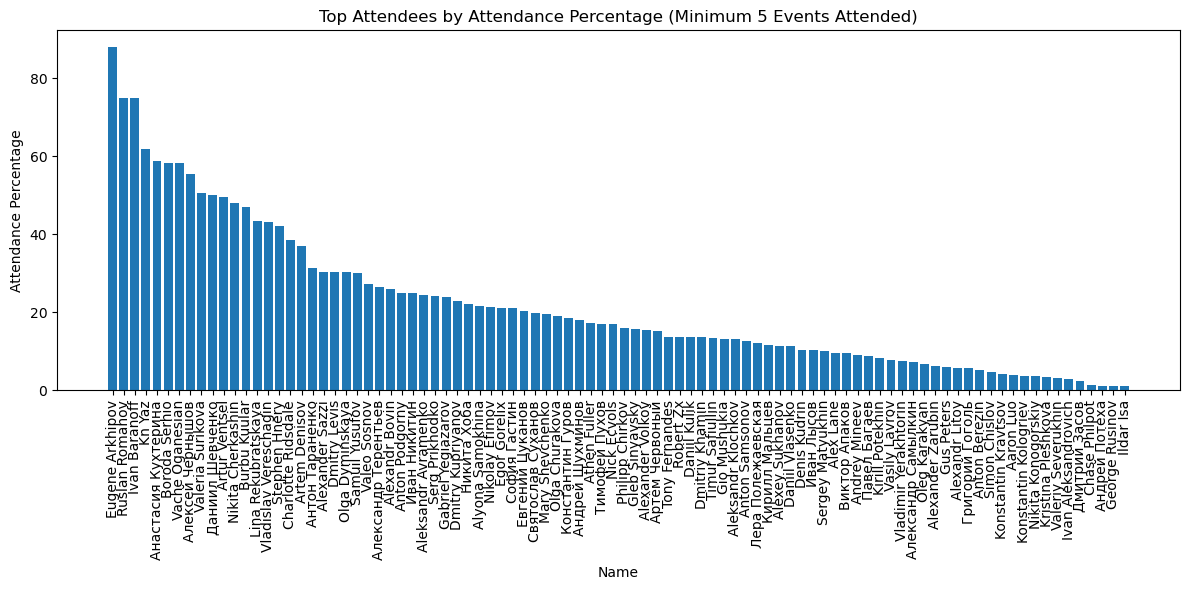

In [80]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the bar chart
plt.bar(sorted_filtered_availability_df["Name"], sorted_filtered_availability_df["Attendance_Percentage"])

# Set labels and title
plt.xlabel("Name")
plt.ylabel("Attendance Percentage")
plt.title("Top Attendees by Attendance Percentage (Minimum 5 Events Attended)")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


#Eugene Arkhipov Personal Attendance Statistics

In [81]:
# Filter the DataFrame to select rows where Eugene Arkhipov is in the "Going" column
eugene_events = df_att[df_att['Going'].str.contains('Eugene Arkhipov', case=False)]

# Sample duration values from the filtered DataFrame
eugene_durations = eugene_events['Duration']

# Define a function to convert a duration string to minutes
def convert_duration_to_minutes(duration_str):
    parts = duration_str.split()
    minutes = 0

    for i in range(len(parts)):
        if parts[i] == 'days':
            minutes += int(parts[i - 1]) * 24 * 60
        elif parts[i] == 'hr':
            minutes += int(parts[i - 1]) * 60
        elif parts[i] == 'min':
            minutes += int(parts[i - 1])

    return minutes

# Convert the duration strings to minutes and sum them
total_minutes = sum([convert_duration_to_minutes(duration) for duration in eugene_durations])

# Convert the total minutes back to hours and minutes
total_hours = total_minutes // 60
remaining_minutes = total_minutes % 60

# Print the total duration for events where Eugene Arkhipov was present
print(f"Total Duration for Eugene Arkhipov's Events: {total_hours} hr {remaining_minutes} min")



Total Duration for Eugene Arkhipov's Events: 2073 hr 39 min


##Artur Test

In [82]:
# Filter the DataFrame to select rows where Artur Ventsel is in the "Going" column
artur_events = df_att[df_att['Going'].str.contains('Artur Ventsel', case=False)]

# Sample duration values from the filtered DataFrame
artur_durations = artur_events['Duration']

# Define a function to convert a duration string to minutes
def convert_duration_to_minutes(duration_str):
    parts = duration_str.split()
    minutes = 0

    for i in range(len(parts)):
        if parts[i] == 'days':
            minutes += int(parts[i - 1]) * 24 * 60
        elif parts[i] == 'hr':
            minutes += int(parts[i - 1]) * 60
        elif parts[i] == 'min':
            minutes += int(parts[i - 1])

    return minutes

# Convert the duration strings to minutes and sum them
total_minutes = sum([convert_duration_to_minutes(duration) for duration in artur_durations])

# Convert the total minutes back to hours and minutes
total_hours = total_minutes // 60
remaining_minutes = total_minutes % 60

# Print the total duration for events where Artur Ventsel was present
print(f"Total Duration for Artur Ventsel's Events: {total_hours} hr {remaining_minutes} min")

Total Duration for Artur Ventsel's Events: 1263 hr 9 min


##Event names count attended by Eugene

In [83]:
# Filter the DataFrame to select rows where Eugene Arkhipov is in the "Going" column
eugene_events = df_att[df_att['Going'].str.contains('Eugene Arkhipov', case=False)]

# Count the number of occurrences of each unique event
event_counts = eugene_events['Name'].value_counts()

# Print the counts of each event
print("Events Eugene Arkhipov Attended:")
print(event_counts)


Events Eugene Arkhipov Attended:
Академия Лакросса                                      258
Тренировка в воскресенье                                62
Тренировка (суб вечер)                                  59
Тренировка на поляне                                    54
Тренировка (вос днем)                                   52
                                                      ... 
Функциональный тренинг в Сокольниках                     1
Лакросс на Днем Спорта в Сокольниках. Часть вторая.      1
Тренировка в Субботу                                     1
Днем На Поляне                                           1
Пробная игра на новом поле                               1
Name: Name, Length: 96, dtype: int64


##Event Types count attended by Eugene

In [84]:
# Filter the DataFrame to select rows where Eugene Arkhipov is in the "Going" column
eugene_events = df_att[df_att['Going'].str.contains('Eugene Arkhipov', case=False)]

# Count the number of occurrences of each unique event type
type_counts = eugene_events['Type'].value_counts()

# Print the counts of each event type
print("Event Types Eugene Arkhipov Attended:")
print(type_counts)


Event Types Eugene Arkhipov Attended:
Team Practice                  378
Skills Practice                262
Theory                          13
Tournament                      12
Intra-Squad Game                10
Championship                     6
Clinic                           5
Clinic/Game/Marketing Event      3
Stringing                        3
Conditioning                     2
Administrative Function          2
Training Camp                    2
Team Building                    1
Name: Type, dtype: int64


##Events Attended by Eugene per year

In [85]:
# Filter the DataFrame to select rows where Eugene Arkhipov is in the "Going" column
eugene_events = df_att[df_att['Going'].str.contains('Eugene Arkhipov', case=False)]

# Group the filtered DataFrame by the "Year" column and count the occurrences
events_per_year = eugene_events['Year'].value_counts().sort_index()

# Print the count of events attended by Eugene Arkhipov each year
print("Events Attended by Eugene Arkhipov Each Year:")
print(events_per_year)


Events Attended by Eugene Arkhipov Each Year:
2015     51
2016    127
2017    115
2018     91
2019     61
2020    119
2021    122
2022     13
Name: Year, dtype: int64


##Event types attended by Eugene each year

In [86]:
# Filter the DataFrame to select rows where Eugene Arkhipov is in the "Going" column
eugene_events = df_att[df_att['Going'].str.contains('Eugene Arkhipov', case=False)]

# Group the filtered DataFrame by the "Year" column and count the total occurrences
events_per_year = eugene_events['Year'].value_counts().sort_index()

# Filter the DataFrame to select rows with "Team Practice" events attended by Eugene
team_practice_events = eugene_events[eugene_events['Type'] == 'Team Practice']

# Group the filtered "Team Practice" DataFrame by the "Year" column and count the occurrences
team_practice_per_year = team_practice_events['Year'].value_counts().sort_index()

# Filter the DataFrame to select rows with "Skills Practice" events attended by Eugene
skills_practice_events = eugene_events[eugene_events['Type'] == 'Skills Practice']

# Group the filtered "Skills Practice" DataFrame by the "Year" column and count the occurrences
skills_practice_per_year = skills_practice_events['Year'].value_counts().sort_index()

# Filter the main DataFrame (df_att) to select rows where Eugene Arkhipov is in the "Going" column
other_events = df_att[df_att['Going'].str.contains('Eugene Arkhipov', case=False, na=False)]

# Exclude "Skills Practice" and "Team Practice" events
other_events = other_events[~other_events['Type'].isin(['Skills Practice', 'Team Practice'])]

# Group the "Other Events" DataFrame by the "Year" column and count the occurrences
other_events_per_year = other_events['Year'].value_counts().sort_index()

# Merge all the Series to create a DataFrame with all the information
result = pd.DataFrame({'Total Events Attended': events_per_year, 'Team Practice Attended': team_practice_per_year, 'Skills Practice Attended': skills_practice_per_year, 'Other Events Attended': other_events_per_year})
result.fillna(0, inplace=True)  # Fill NaN values with 0

# Print the result
print("Events Attended by Eugene Arkhipov Each Year:")
print(result)


Events Attended by Eugene Arkhipov Each Year:
      Total Events Attended  Team Practice Attended  Skills Practice Attended  \
2015                     51                      43                       1.0   
2016                    127                      61                      55.0   
2017                    115                      47                      50.0   
2018                     91                      31                      55.0   
2019                     61                      43                      17.0   
2020                    119                      47                      63.0   
2021                    122                      93                      21.0   
2022                     13                      13                       0.0   

      Other Events Attended  
2015                    7.0  
2016                   11.0  
2017                   18.0  
2018                    5.0  
2019                    1.0  
2020                    9.0  
2021          

##Events attended by Eugene by month

In [87]:
# Filter the DataFrame to select rows where Eugene Arkhipov is in the "Going" column
eugene_events = df_att[df_att['Going'].str.contains('Eugene Arkhipov', case=False)].copy()

# Convert the "Date_Date_Excel" column to datetime objects
eugene_events["Date_Date_Excel"] = pd.to_datetime(eugene_events["Date_Date_Excel"])

# Extract the month from the "Date_Date_Excel" column and create a new "Month" column
eugene_events['Month'] = eugene_events["Date_Date_Excel"].dt.month

# Group the DataFrame by month and count the total occurrences
eugene_events_per_month = eugene_events['Month'].value_counts().sort_index()

# Print the breakdown of events attended by Eugene Arkhipov for each month
print("Events Attended by Eugene Arkhipov Each Month:")
print(eugene_events_per_month)


Events Attended by Eugene Arkhipov Each Month:
1     27
2     38
3     51
4     58
5     80
6     76
7     74
8     83
9     77
10    60
11    35
12    40
Name: Month, dtype: int64
